In [1]:
%cd /workspace/data

/workspace/data


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [119]:

# !mkdir test
# !mkdir /content/test/data
# !mkdir /content/test/structure_set

In [120]:
# !rm -r /content/test/038171
# !cp /content/test/038171/data/RS.11F2023_038171.CT_03JAN_2024.dcm -d /content/test/038171/structure_set
# !rm /content/test/038171/data/RS.11F2023_038171.CT_03JAN_2024.dcm

In [4]:
# !unzip /workspace/data/AUTO_SEGMENTATION/AUTO_SEGMENTATION_P2.zip -d /workspace/data/AUTO_SEGMENTATION/

In [ ]:
# !unzip /workspace/data/AUTO_SEGMENTATION_TEST.zip -d /workspace/data/

In [130]:
!nvidia-smi

Sat Aug 31 10:28:25 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.125.06   Driver Version: 525.125.06   CUDA Version: 12.3     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  On   | 00000000:C8:00.0 Off |                    0 |
| N/A   36C    P0    82W / 400W |   9205MiB / 81920MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [107]:
from glob import glob
import os
from typing import List
import numpy as np
import pydicom
from pydicom.data import get_testdata_file
from pydicom.dataset import Dataset
from pydicom.pixel_data_handlers import apply_modality_lut
from rt_utils import RTStructBuilder
import matplotlib.pyplot as plt
from natsort import natsorted
import nibabel as nib
import cv2
import torch
import warnings
import pandas as pd
from torch import nn
from PIL import Image
from torchsummary import summary
import torch.optim as optim
# from unet3d import UNet3d
from IPython import display
import matplotlib.pyplot as plt
from skimage.util import montage
from tqdm.autonotebook import tqdm
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.autograd import Variable
from natsort import natsorted
# from keras.preprocessing.image import ImageDataGenerator
from torch.utils.data.sampler import SubsetRandomSampler
from sklearn.model_selection import StratifiedShuffleSplit
from torch.utils.tensorboard import SummaryWriter
import torch.optim.lr_scheduler as lr_scheduler
import SimpleITK as sitk
import logging
import torch.backends.cudnn as cudnn
import sys
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import colorsys
from scipy import ndimage
from scipy.ndimage import zoom
from torch.utils.data import Dataset
from torchvision import transforms

In [108]:
# !rm - r /content/test/.ipynb_checkpoints
cfg_path= "/workspace/data/AUTO_SEGMENTATION" 

img_list=[]
for fold in os.listdir(cfg_path):
#   print(fold)
  img_lst= glob(os.path.join(cfg_path, fold, "data", "CT*.dcm" ), recursive= True)
  img_list.extend(img_lst)

In [109]:
img_list

['/workspace/data/AUTO_SEGMENTATION/AUTO_SEG_17/data/CT.AUTO_SEG_17.Image 31.dcm',
 '/workspace/data/AUTO_SEGMENTATION/AUTO_SEG_17/data/CT.AUTO_SEG_17.Image 40.dcm',
 '/workspace/data/AUTO_SEGMENTATION/AUTO_SEG_17/data/CT.AUTO_SEG_17.Image 130.dcm',
 '/workspace/data/AUTO_SEGMENTATION/AUTO_SEG_17/data/CT.AUTO_SEG_17.Image 87.dcm',
 '/workspace/data/AUTO_SEGMENTATION/AUTO_SEG_17/data/CT.AUTO_SEG_17.Image 131.dcm',
 '/workspace/data/AUTO_SEGMENTATION/AUTO_SEG_17/data/CT.AUTO_SEG_17.Image 86.dcm',
 '/workspace/data/AUTO_SEGMENTATION/AUTO_SEG_17/data/CT.AUTO_SEG_17.Image 102.dcm',
 '/workspace/data/AUTO_SEGMENTATION/AUTO_SEG_17/data/CT.AUTO_SEG_17.Image 91.dcm',
 '/workspace/data/AUTO_SEGMENTATION/AUTO_SEG_17/data/CT.AUTO_SEG_17.Image 125.dcm',
 '/workspace/data/AUTO_SEGMENTATION/AUTO_SEG_17/data/CT.AUTO_SEG_17.Image 155.dcm',
 '/workspace/data/AUTO_SEGMENTATION/AUTO_SEG_17/data/CT.AUTO_SEG_17.Image 24.dcm',
 '/workspace/data/AUTO_SEGMENTATION/AUTO_SEG_17/data/CT.AUTO_SEG_17.Image 120.dcm'

['RS.AUTO_SEG_17.AUTO_SEGMENT.dcm']
['BODY', 'Esophagus', 'Intestine', 'Kidney_L', 'Kidney_R', 'Lung_L', 'Lung_R', 'Pancreas', 'Spleen', 'Stomach', 'Liver']
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


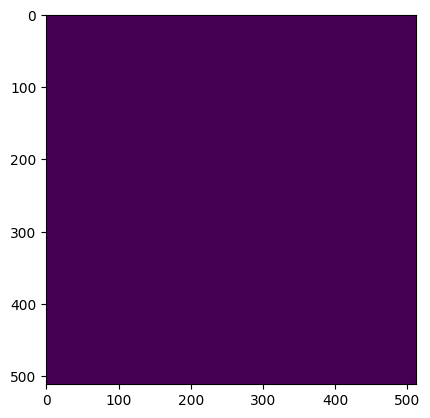

['RS.AUTO_SEG_15.AUTO_SEGMENT.dcm']
['Stomach', 'Spleen', 'Pancreas', 'Lung_R', 'Lung_L', 'Kidney_R', 'Kidney_L', 'Intestine', 'Esophagus', 'BODY', 'Liver']
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


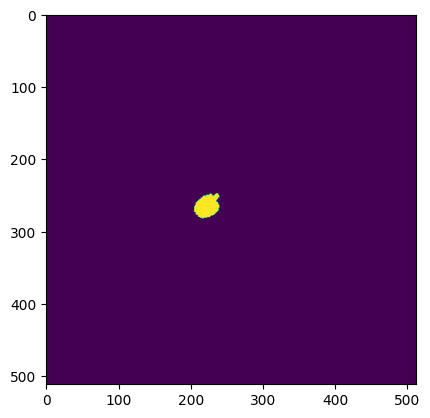

['RS.AUTO_SEG_6.AUTO_SEGMENT.dcm']
['Kidney_R', 'Kidney_L', 'Intestine', 'Esophagus', 'BODY', 'Stomach', 'Spleen', 'Pancreas', 'Lung_R', 'Lung_L', 'Liver']
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


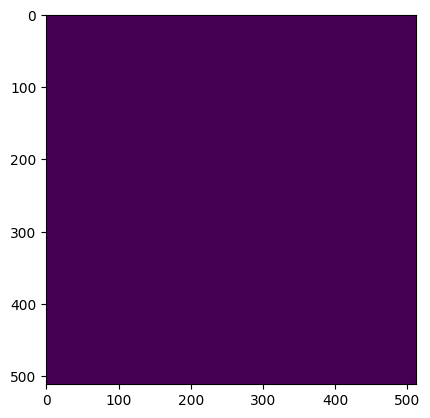

['RS.AUTO_SEG_4.AUTO_SEGMENT.dcm']
['BODY', 'Esophagus', 'Intestine', 'Kidney_L', 'Kidney_R', 'Lung_L', 'Lung_R', 'Pancreas', 'Spleen', 'Stomach', 'Liver']
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


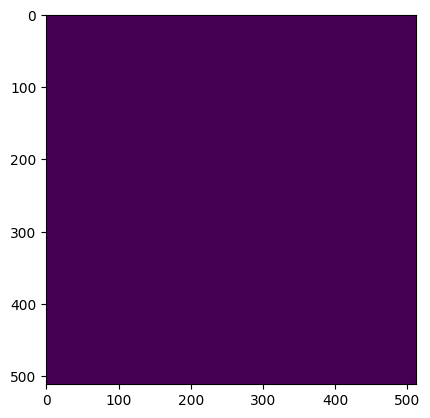

['RS.AUTO_SEG_28.AUTO_SEGMENT.dcm']
['Stomach', 'Spleen', 'Pancreas', 'Lung_R', 'Lung_L', 'Liver', 'Kidney_R', 'Kidney_L', 'Intestine', 'Esophagus', 'BODY']
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


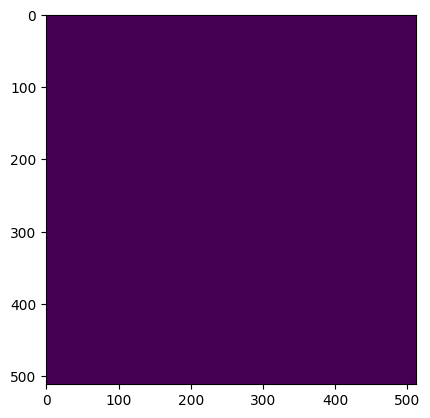

['RS.AUTO_SEG_7.AUTO_SEGMENT.dcm']
['Stomach', 'Spleen', 'Pancreas', 'Lung_R', 'Lung_L', 'Kidney_R', 'Kidney_L', 'Intestine', 'Esophagus', 'BODY', 'Liver']
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


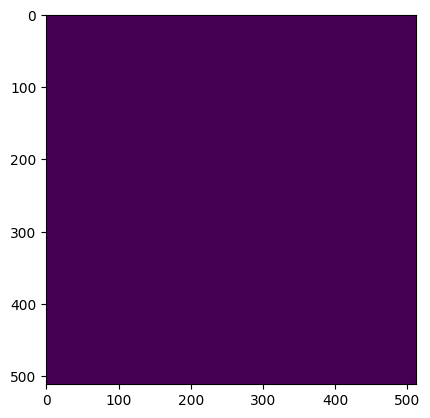

['RS.AUTO_SEG_3.AUTO_SEGMENT.dcm']
['BODY', 'Esophagus', 'Intestine', 'Kidney_L', 'Kidney_R', 'Lung_L', 'Lung_R', 'Pancreas', 'Spleen', 'Stomach', 'Liver']
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


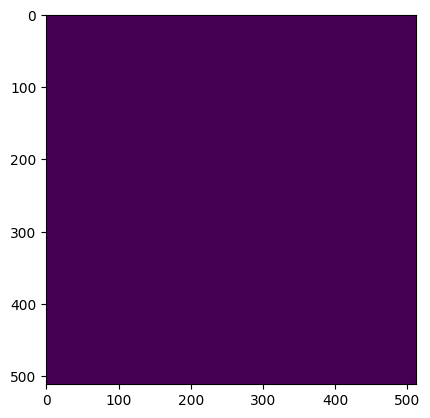

['RS.AUTO_SEG_1.AUTO_SEGMENT.dcm']
['Stomach', 'Spleen', 'Pancreas', 'Lung_R', 'Lung_L', 'Kidney_R', 'Kidney_L', 'Intestine', 'Esophagus', 'BODY', 'Liver']
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


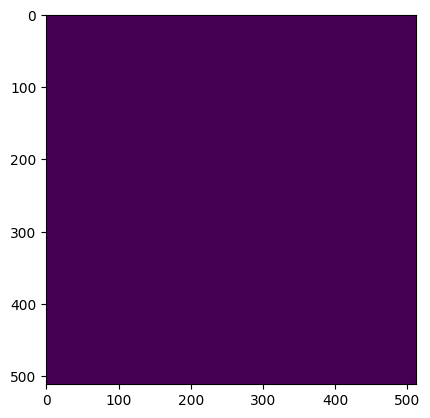

['RS.AUTO_SEG_24.AUTO_SEGMENT.dcm']
['Stomach', 'Spleen', 'Pancreas', 'Lung_R', 'Lung_L', 'Liver', 'Kidney_R', 'Kidney_L', 'Intestine', 'Esophagus', 'BODY']
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


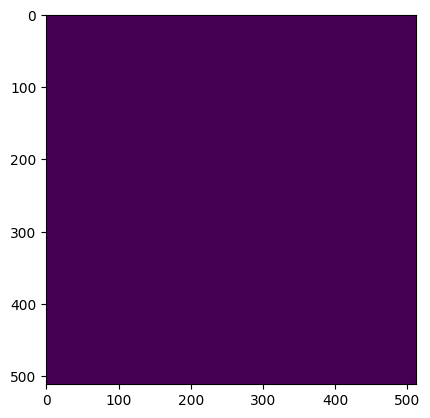

['RS.AUTO_SEG_20.AUTO_SEGMENT.dcm']
['Stomach', 'Spleen', 'Pancreas', 'Lung_R', 'Lung_L', 'Kidney_R', 'Kidney_L', 'Intestine', 'Esophagus', 'BODY', 'Liver']
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


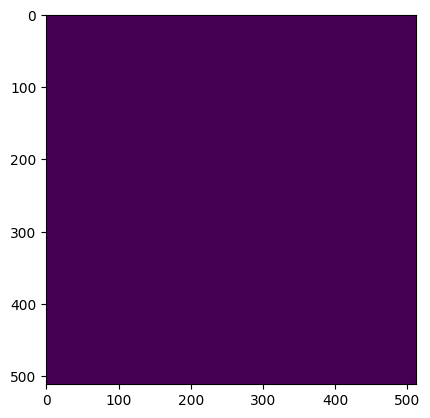

['RS.AUTO_SEG_32.AUTO_SEGMENT.dcm']
['Heart', 'BODY', 'Esophagus', 'Intestine', 'Kidney_L', 'Kidney_R', 'Liver', 'Lung_L', 'Lung_R', 'Pancreas', 'Spleen', 'Stomach']
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


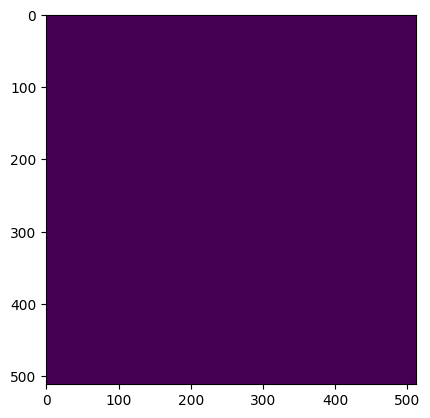

['RS.AUTO_SEG_2.AUTO_SEGMENT.dcm']
['Stomach', 'Intestine', 'BODY', 'Spleen', 'Pancreas', 'Kidney_L', 'Esophagus', 'Lung_R', 'Lung_L', 'Kidney_R', 'Liver']
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


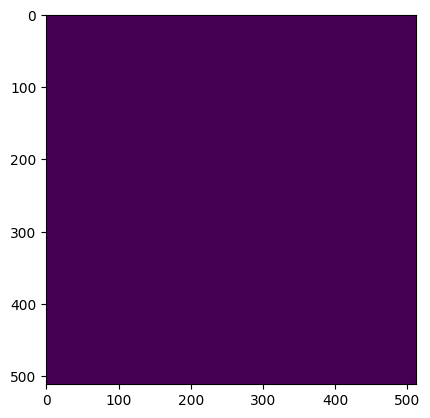

['RS.AUTO_SEG_30.AUTO_SEGMENT.dcm']
['Lung_R', 'Lung_L', 'Liver', 'Kidney_R', 'Kidney_L', 'Heart', 'Esophagus', 'Intestine', 'BODY', 'Pancreas', 'Spleen', 'Stomach']
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


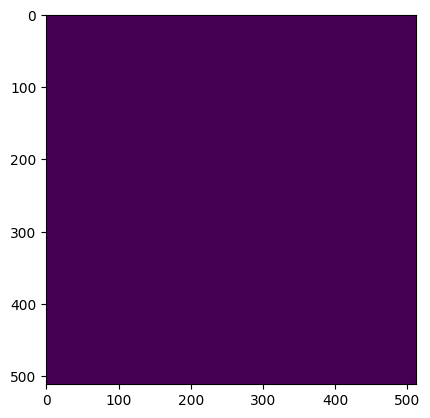

['RS.AUTO_SEG_33.AUTO_SEGMENT.dcm']
['Heart', 'BODY', 'Esophagus', 'Intestine', 'Kidney_L', 'Kidney_R', 'Liver', 'Lung_L', 'Lung_R', 'Pancreas', 'Spleen', 'Stomach']
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


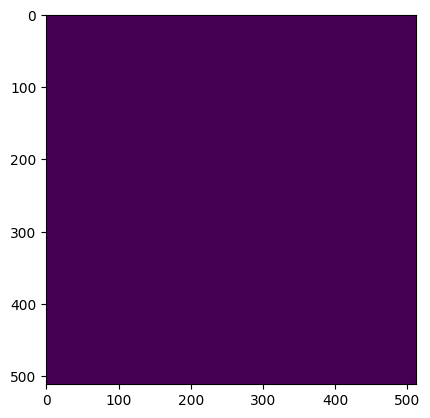

['RS.AUTO_SEG_5.AUTO_SEGMENT.dcm']
['Esophagus', 'Intestine', 'Kidney_L', 'Kidney_R', 'Lung_L', 'Lung_R', 'Pancreas', 'Spleen', 'Stomach', 'BODY', 'Liver']
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


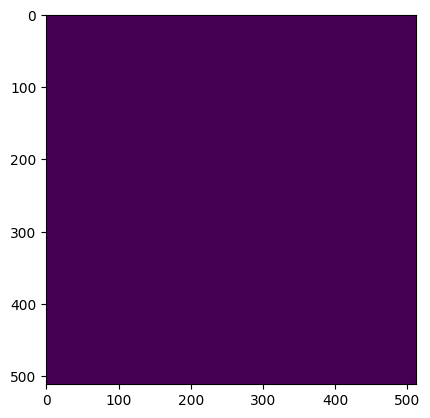

['RS.AUTO_SEG_12.AUTO_SEGMENT.dcm']
['Stomach', 'Spleen', 'Pancreas', 'Lung_R', 'Lung_L', 'Kidney_R', 'Kidney_L', 'Intestine', 'Esophagus', 'BODY', 'Liver']
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


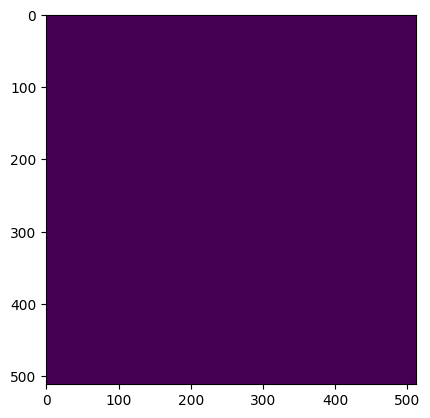

['RS.AUTO_SEG_31.AUTO_SEGMENT.dcm']
['BODY', 'Heart', 'Stomach', 'Spleen', 'Pancreas', 'Lung_R', 'Lung_L', 'Liver', 'Kidney_R', 'Kidney_L', 'Intestine', 'Esophagus']
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


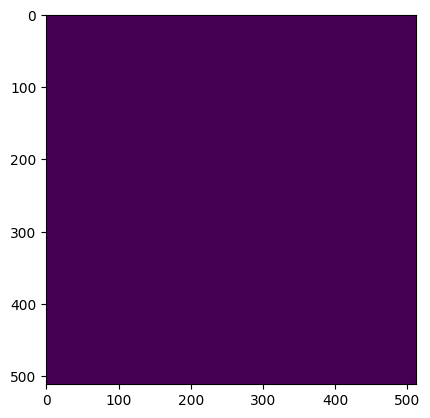

['RS.AUTO_SEG_18.AUTO_SEGMENT.dcm']
['BODY', 'Stomach', 'Spleen', 'Pancreas', 'Lung_R', 'Lung_L', 'Kidney_R', 'Kidney_L', 'Intestine', 'Esophagus', 'Liver']
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


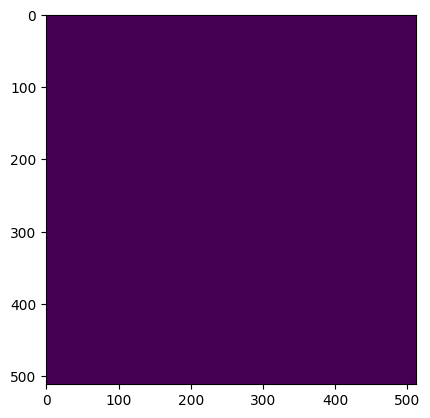

['RS.AUTO_SEG_29.AUTO_SEGMENT.dcm']
['Heart', 'BODY', 'Esophagus', 'Intestine', 'Kidney_L', 'Kidney_R', 'Liver', 'Lung_L', 'Lung_R', 'Pancreas', 'Spleen', 'Stomach']
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


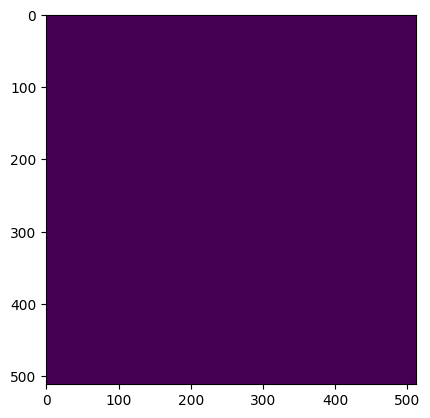

['RS.AUTO_SEG_35.AUTO_SEGMENT.dcm']
['BODY', 'Esophagus', 'Intestine', 'Kidney_L', 'Kidney_R', 'Liver', 'Lung_L', 'Lung_R', 'Pancreas', 'Spleen', 'Stomach']
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


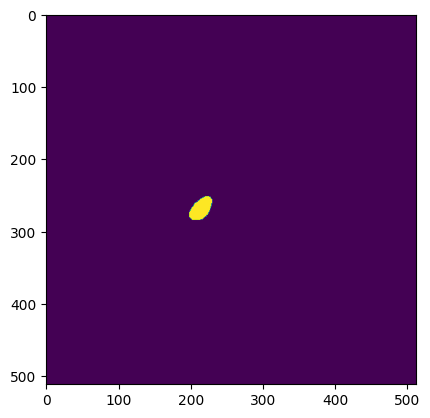

['RS.AUTO_SEG_9.AUTO_SEGMENT.dcm']
['Kidney_R', 'Lung_L', 'Lung_R', 'Pancreas', 'Spleen', 'Stomach', 'Intestine', 'Kidney_L', 'BODY', 'Esophagus', 'Liver']
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


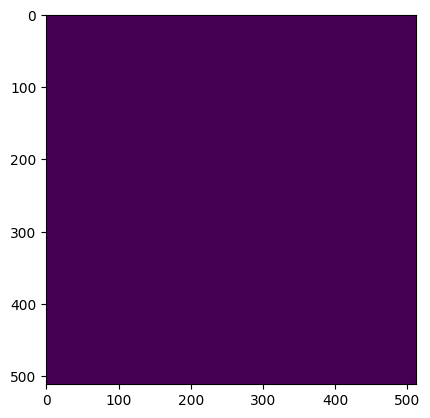

['RS.AUTO_SEG_14.AUTO_SEGMENT.dcm']
['BODY', 'Lung_R', 'Pancreas', 'Spleen', 'Stomach', 'Esophagus', 'Intestine', 'Kidney_L', 'Kidney_R', 'Lung_L', 'Liver']
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


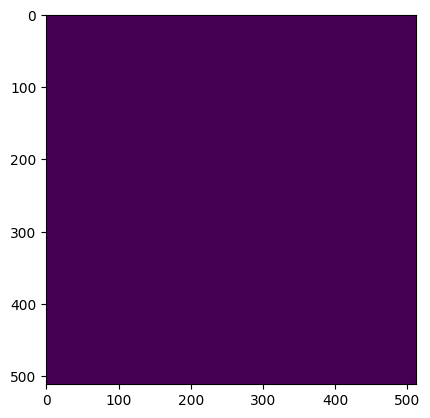

['RS.AUTO_SEG_13.AUTO_SEGMENT.dcm']
['Stomach', 'Spleen', 'Pancreas', 'Lung_R', 'BODY', 'Esophagus', 'Intestine', 'Kidney_L', 'Kidney_R', 'Lung_L', 'Liver']
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


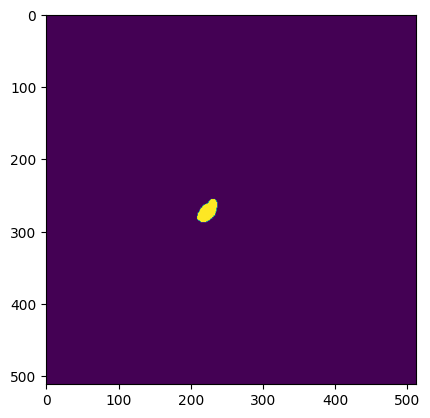

['RS.AUTO_SEG_27.AUTO_SEGMENT.dcm']
['Esophagus', 'Intestine', 'Kidney_L', 'Kidney_R', 'Liver', 'Lung_L', 'Lung_R', 'Pancreas', 'Spleen', 'Stomach', 'BODY']
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


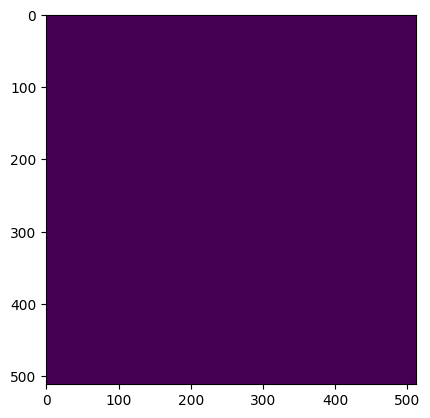

['RS.AUTO_SEG_21.AUTO_SEGMENT.dcm']
['Stomach', 'Spleen', 'Pancreas', 'Lung_R', 'Lung_L', 'Liver', 'Kidney_R', 'Kidney_L', 'Intestine', 'Esophagus', 'BODY']
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


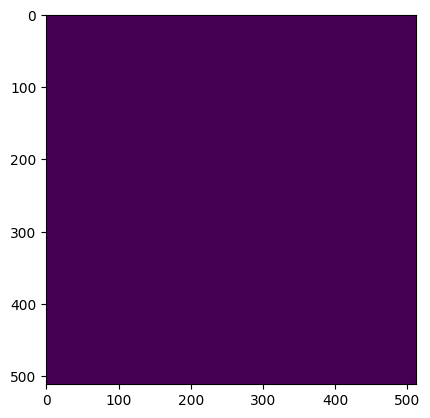

['RS.AUTO_SEG_8.AUTO_SEGMENT.dcm']
['Stomach', 'Spleen', 'Pancreas', 'Lung_R', 'Lung_L', 'Kidney_R', 'Kidney_L', 'Intestine', 'Esophagus', 'BODY', 'Liver']
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


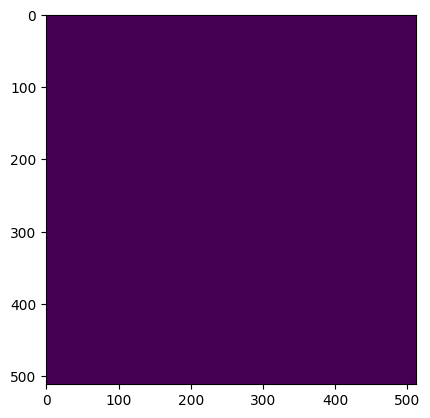

['RS.AUTO_SEG_34.AUTO_SEGMENT.dcm']
['Stomach', 'Spleen', 'Pancreas', 'Lung_R', 'Lung_L', 'Liver', 'Kidney_R', 'Kidney_L', 'Intestine', 'Heart', 'Esophagus', 'BODY']
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


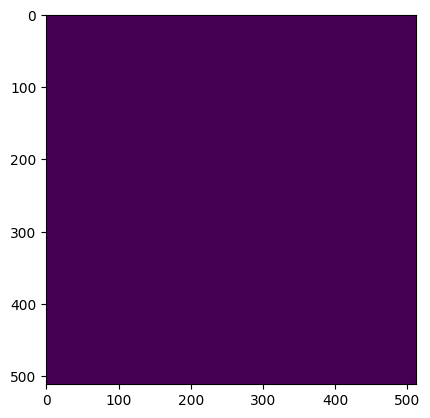

['RS.AUTO_SEG_19.AUTO_SEGMENT.dcm']
['BODY', 'Esophagus', 'Intestine', 'Kidney_L', 'Kidney_R', 'Lung_L', 'Lung_R', 'Pancreas', 'Spleen', 'Stomach', 'Liver']
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


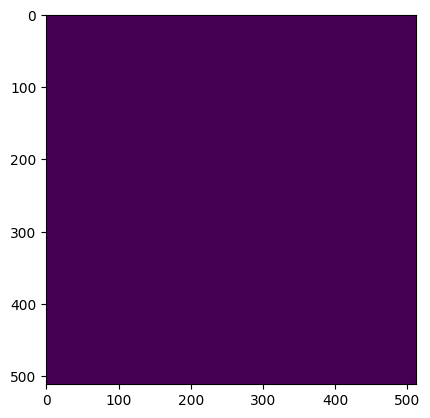

['RS.AUTO_SEG_16.AUTO_SEGMENT.dcm']
['BODY', 'Esophagus', 'Intestine', 'Kidney_L', 'Kidney_R', 'Lung_L', 'Lung_R', 'Pancreas', 'Spleen', 'Stomach', 'Liver']
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


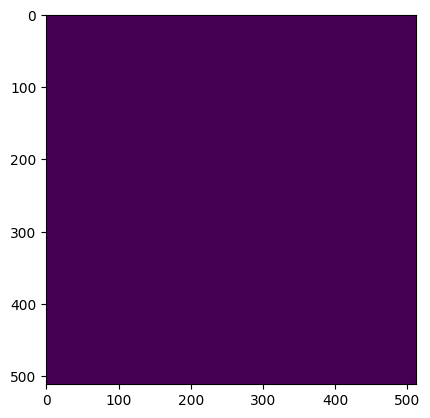

['RS.AUTO_SEG_11.AUTO_SEGMENT.dcm']
['Stomach', 'Spleen', 'Pancreas', 'Lung_R', 'Intestine', 'Esophagus', 'BODY', 'Lung_L', 'Kidney_R', 'Kidney_L', 'Liver']
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


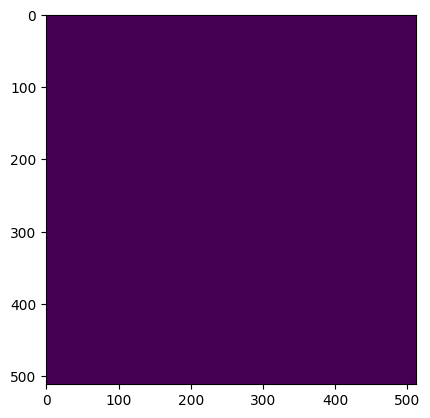

['RS.AUTO_SEG_10.AUTO_SEGMENT.dcm']
['Liver', 'Stomach', 'Spleen', 'Pancreas', 'Lung_R', 'Lung_L', 'Kidney_R', 'Kidney_L', 'Intestine', 'Esophagus', 'BODY']
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


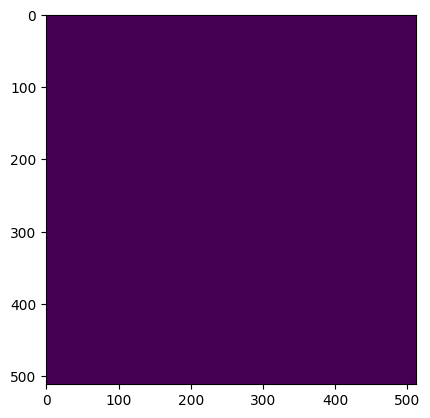

In [110]:
cfg_path= "/workspace/data/AUTO_SEGMENTATION" 
for fold in os.listdir(cfg_path):
# Load existing RT Struct. Requires the series path and existing RT Struct path
  struct_file= os.listdir(os.path.join(cfg_path, fold, "structure_set"))
  print(struct_file)
  rtstruct = RTStructBuilder.create_from(
    dicom_series_path=os.path.join(cfg_path, fold, "data"),
    rt_struct_path=os.path.join(cfg_path, fold, "structure_set", struct_file[0])
  )

  # View all of the ROI names from within the image
  print(rtstruct.get_roi_names())

  # Loading the 3D Mask from within the RT Struct
  mask_3d = rtstruct.get_roi_mask_by_name("Kidney_R") #spleen 84 #Pancreas 80 #oral cavity 130, Lung 95


  # Display one slice of the region
  first_mask_slice = mask_3d[:, :,90]
  print(first_mask_slice)
  plt.imshow(first_mask_slice)
  plt.show()


In [111]:


def ret_mask(class_index, dcm_sr_path, rt_struct_path):

  rtstruct = RTStructBuilder.create_from(
  dicom_series_path=dcm_sr_path,
  rt_struct_path=rt_struct_path
)

# ['BODY', 'Esophagus', 'Intestine', 'Kidney_L', 'Kidney_R', 'Lung_L', 'Lung_R', 'Pancreas', 'Spleen', 'Stomach', 'Liver']

#An individual mask data is basically an array with different pixels having true or false for a particular class
  class_id_lst= list(class_index.keys())

  mask_3d_ep= rtstruct.get_roi_mask_by_name(class_id_lst[0])
  mask_3d_ep= mask_3d_ep * class_index['Esophagus']

  mask_3d_ll= rtstruct.get_roi_mask_by_name(class_id_lst[1])
  mask_3d_ll= mask_3d_ll * class_index['Lung_L']

  mask_3d_lr= rtstruct.get_roi_mask_by_name(class_id_lst[2])
  mask_3d_lr= mask_3d_lr * class_index['Lung_R']

  mask_3d_kl= rtstruct.get_roi_mask_by_name(class_id_lst[3])
  mask_3d_kl= mask_3d_kl * class_index['Kidney_L']

  mask_3d_kr= rtstruct.get_roi_mask_by_name(class_id_lst[4])
  mask_3d_kr= mask_3d_kr * class_index['Kidney_R']

  mask_3d_sto= rtstruct.get_roi_mask_by_name(class_id_lst[5])
  mask_3d_sto= mask_3d_sto * class_index['Stomach']
    
  mask_3d_liv= rtstruct.get_roi_mask_by_name(class_id_lst[6])
  mask_3d_liv= mask_3d_liv * class_index['Liver']  
    
  mask_3d_sp= rtstruct.get_roi_mask_by_name(class_id_lst[7])
  mask_3d_sp= mask_3d_sp * class_index['Spleen']
    
  mask_3d_pan= rtstruct.get_roi_mask_by_name(class_id_lst[8])
  mask_3d_pan= mask_3d_pan * class_index['Pancreas']
    
  mask_3d_int= rtstruct.get_roi_mask_by_name(class_id_lst[9])
  mask_3d_int= mask_3d_int * class_index['Intestine']

  mask = np.maximum.reduce([mask_3d_ep, mask_3d_ll, mask_3d_lr, mask_3d_kl, mask_3d_kr, mask_3d_sto, mask_3d_liv, mask_3d_sp, mask_3d_pan, mask_3d_int])
#   mask = np.maximum.reduce([mask_3d_ep, mask_3d_ll, mask_3d_lr, mask_3d_kl, mask_3d_kr, mask_3d_int])


  return mask

# first_mask_slice = mask_3d_pac[:, :,80]
# lst= first_mask_slice.flatten()
# print(max(lst))
# plt.imshow(first_mask_slice)
# plt.show()

# mask_3d_pac= rtstruct.get_roi_mask_by_name("Pancreas")
# mask_3d_oc= rtstruct.get_roi_mask_by_name("Oral_Cavity+PPW")
# mask_3d_ll= rtstruct.get_roi_mask_by_name("Lung_R")
# mask_3d_lr= rtstruct.get_roi_mask_by_name("Lung_L")

# mask= ret_mask(class_index)

In [112]:
def load_dcm_images_from_path(dicom_series_path: str) -> List[Dataset]:
    series_data = []
    for root, _, files in os.walk(dicom_series_path):
      for file in files:
        try:
          ds = pydicom.dcmread(os.path.join(root, file))
          if hasattr(ds, "pixel_array"):
              series_data.append(ds)

        except Exception:
            # Not a valid DICOM file
          continue

    return series_data

In [113]:
def get_slice_position(series_slice: Dataset):
  _, _, slice_direction = get_slice_directions(series_slice)
  return np.dot(slice_direction, series_slice.ImagePositionPatient)


def get_slice_directions(series_slice: Dataset):
  orientation = series_slice.ImageOrientationPatient
  # print(orientation)
  row_direction = np.array(orientation[:3])
  column_direction = np.array(orientation[3:])
  slice_direction = np.cross(row_direction, column_direction)

  if not np.allclose(
    np.dot(row_direction, column_direction), 0.0, atol=1e-3
) or not np.allclose(np.linalg.norm(slice_direction), 1.0, atol=1e-3):
    raise Exception("Invalid Image Orientation (Patient) attribute")

  return row_direction, column_direction, slice_direction


def load_sorted_image_series(dicom_series_path: str):
    """
    File contains helper methods for loading / formatting DICOM images and contours
    """
    dcimg_data= []

    series_data = load_dcm_images_from_path(dicom_series_path)

    if len(series_data) == 0:
        raise Exception("No DICOM Images found in input path")

    # Sort slices in ascending order
    # series_data= natsorted(seq= series_data, key=get_slice_position, reverse=False)
    series_data.sort(key=get_slice_position, reverse=False)

    for data in series_data:
      hu = apply_modality_lut(data.pixel_array, data)
      dcimg_data.append(hu)
    # return series_data


    return dcimg_data


In [114]:
# class AbdomenDataset(Dataset):
#   def __init__(self, img_list,lbl_list, class_index, input_D=15 , input_H= 256 , input_W=256, phase='train'):
#     # with open(img_list, 'r') as f:
#     #     self.img_list = [line.strip() for line in f]
#     self.img_list= natsorted(img_list)
#     self.lbl_list= natsorted(lbl_list)
#     print("Processing {} datas".format(len(self.img_list)))
#     # self.root_dir = root_dir
#     self.input_D = input_D
#     self.input_H = input_H
#     self.input_W = input_W
#     self.phase = "train"
#     sample= {}

#   def __nii2tensorarray__(self, data):
#     [z, y, x] = data.shape
#     new_data = np.reshape(data, [1, z, y, x])
#     # print(new_data.shape,"new data")
#     new_data = new_data.astype("float32")

#     return new_data

#   def __len__(self):
#     return len(self.img_list)

#   def __getitem__(self, idx):
#     if self.phase == "train":
#       # read image and label
#       img_path = self.img_list[idx]
#       label_path = self.lbl_list[idx]
#       # print(img_path, label_path)
#       assert os.path.isdir(img_path)
#       assert os.path.isfile(label_path)
#       img_lst = load_sorted_image_series(img_path)
#       img= np.dstack(img_lst)
#       # print(img.shape)
#       # img= np.asarray(img_lst)   #converts axial into saggital
#       # img= nib.Nifti1Image(img_arr, affine=np.eye(4))
#       mask = ret_mask(class_index, dcm_sr_path= img_path, rt_struct_path= label_path)
#       # mask= nib.Nifti1Image(mask_3d, affine=np.eye(4), dtype='float32')

#       # img = nib.load(nib_img)  # We have transposed the data from WHD format to DHW
#       # assert img is not None
#       # mask = nib.load(nib_mask)
#       # assert mask is not None

#       # data processing
#       img_array, mask_array = self.__training_data_process__(img, mask)

#       # ncols = 10
#       # nrows = 15
#       # fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize= (20, 20))
#       # for index, axi in enumerate(ax.flat):
#       #   train = img_array[:, :, index]
#       #   axi.imshow(train)
#       # plt.show()


#       # 2 tensor array
#       img_array = self.__nii2tensorarray__(img_array)
#       mask_array = self.__nii2tensorarray__(mask_array)

#       assert img_array.shape ==  mask_array.shape, "img shape:{} is not equal to mask shape:{}".format(img_array.shape, mask_array.shape)

#       sample = {'image': img_array, 'label': mask_array}

#       return sample

#     elif self.phase == "test":
#       # read image
#       # ith_info = self.img_list[idx].split(" ")
#       # img_name = os.path.join(self.root_dir, ith_info[0])
#       img_path = self.img_list[idx]
#       # print(img_name)
#       assert os.path.isdir(img_path)
#       img_lst = load_sorted_image_series(img_path)
#       img_arr= np.dstack(img_lst)
#       # img= nib.Nifti1Image(img_arr, affine=np.eye(4))

#       assert img is not None

#       # data processing
#       img_array = self.__testing_data_process__(img)

#       # 2 tensor array
#       img_array = self.__nii2tensorarray__(img_array)

#       return img_array


#   def __drop_invalid_range__(self, volume, label=None):
#       """
#       Cut off the invalid area
#       """
#       zero_value = volume[0, 0, 0]
#       non_zeros_idx = np.where(volume != zero_value)

#       [max_z, max_h, max_w] = np.max(np.array(non_zeros_idx), axis=1)
#       [min_z, min_h, min_w] = np.min(np.array(non_zeros_idx), axis=1)

#       if label is not None:
#           return volume[min_z:max_z, min_h:max_h, min_w:max_w], label[min_z:max_z, min_h:max_h, min_w:max_w]
#       else:
#           return volume[min_z:max_z, min_h:max_h, min_w:max_w]


#   def __random_center_crop__(self, data, label):
#       from random import random
#       """
#       Random crop
#       """
#       target_indexs = np.where(label>0)
#       # print(target_indexs)
#       [img_d, img_h, img_w] = data.shape
#       [max_D, max_H, max_W] = np.max(np.array(target_indexs), axis=1)
#       [min_D, min_H, min_W] = np.min(np.array(target_indexs), axis=1)
#       [target_depth, target_height, target_width] = np.array([max_D, max_H, max_W]) - np.array([min_D, min_H, min_W])
#       Z_min = int((min_D - target_depth*1.0/2) * random())
#       Y_min = int((min_H - target_height*1.0/2) * random())
#       X_min = int((min_W - target_width*1.0/2) * random())

#       Z_max = int(img_d - ((img_d - (max_D + target_depth*1.0/2)) * random()))
#       Y_max = int(img_h - ((img_h - (max_H + target_height*1.0/2)) * random()))
#       X_max = int(img_w - ((img_w - (max_W + target_width*1.0/2)) * random()))

#       Z_min = np.max([0, Z_min])
#       Y_min = np.max([0, Y_min])
#       X_min = np.max([0, X_min])

#       Z_max = np.min([img_d, Z_max])
#       Y_max = np.min([img_h, Y_max])
#       X_max = np.min([img_w, X_max])

#       Z_min = int(Z_min)
#       Y_min = int(Y_min)
#       X_min = int(X_min)

#       Z_max = int(Z_max)
#       Y_max = int(Y_max)
#       X_max = int(X_max)

#       return data[Z_min: Z_max, Y_min: Y_max, X_min: X_max], label[Z_min: Z_max, Y_min: Y_max, X_min: X_max]



#   def __itensity_normalize_one_volume__(self, volume):
#       """
#       normalize the itensity of an nd volume based on the mean and std of nonzeor region
#       inputs:
#           volume: the input nd volume
#       outputs:
#           out: the normalized nd volume
#       """

#       pixels = volume[volume > 0]
#       mean = pixels.mean()
#       std  = pixels.std()
#       out = (volume - mean)/std
#       out_random = np.random.normal(0, 1, size = volume.shape)
#       out[volume == 0] = out_random[volume == 0]
#       return out

#   def __resize_data__(self, data):
#       """
#       Resize the data to the input size
#       """
#       # print(data.shape, "in resize data")
#       [depth, height, width] = data.shape
#       # print(depth, height, width)
#       scale = [self.input_D*1.0/depth, self.input_H*1.0/height, self.input_W*1.0/width]
#       # data = ndimage.interpolation.zoom(data, scale, order=0)
#       data = zoom(data, scale, order=0)

#       return data


#   def __crop_data__(self, data, label):
#       """
#       Random crop with different methods:
#       """
#       # random center crop
#       data, label = self.__random_center_crop__ (data, label)

#       return data, label

#   def __training_data_process__(self, data, label):
#       # crop data according net input size
#       # data = data.get_fdata()
#       # data= data.transpose(2, 1, 0)
#       # label = label.get_fdata()

#       # data= data.transpose(2, 1, 0)
#       # label= label.transpose(2, 1, 0)

#       data= np.clip(data, a_min= -125, a_max= 275)
#       # drop out the invalid range
#       data, label = self.__drop_invalid_range__(data, label)

#       # crop data
#       # data, label = self.__crop_data__(data, label)

#       data= data.transpose(2, 1, 0)
#       label= label.transpose(2, 1, 0)


#       # resize data
#       data = self.__resize_data__(data)
#       label = self.__resize_data__(label)


#       # normalization datas
#       data = self.__itensity_normalize_one_volume__(data)

#       ncols = 2
#       nrows = 5
#       fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize= (20, 20))
#       for index, axi in enumerate(ax.flat):
#         train = data[index, :, :]
#         axi.imshow(train)
#       plt.show()

#       ncols = 2
#       nrows = 5
#       fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize= (20, 20))
#       for index, axi in enumerate(ax.flat):
#         train = label[index, :, :]
#         axi.imshow(train)
#       plt.show()



#       return data, label


#   def __testing_data_process__(self, data):
#       # crop data according net input size
#       # data = data.get_fdata()
#       data= data.transpose(2, 1, 0)

#       # resize data
#       data = self.__resize_data__(data)

#       # normalization datas
#       data = self.__itensity_normalize_one_volume__(data)

#       return data

In [115]:
class AbdomenDataset(Dataset):
  def __init__(self, img_list,lbl_list, class_index, input_D=15 , input_H= 256 , input_W=256, phase='train'):
    # with open(img_list, 'r') as f:
    #     self.img_list = [line.strip() for line in f]
    self.img_list= natsorted(img_list)
    self.lbl_list= natsorted(lbl_list)
    print("Processing {} datas".format(len(self.img_list)))
    # self.root_dir = root_dir
    self.input_D = input_D
    self.input_H = input_H
    self.input_W = input_W
    self.phase = "train"
    sample= {}

  def __nii2tensorarray__(self, data):
    [z, y, x] = data.shape
    new_data = np.reshape(data, [1, z, y, x])
    # print(new_data.shape,"new data")
    new_data = new_data.astype("float32")

    return new_data

  def __len__(self):
    return len(self.img_list)

  def __getitem__(self, idx):
    if self.phase == "train":
      # read image and label
      img_path = self.img_list[idx]
      label_path = self.lbl_list[idx]
      # print(img_path, label_path)
      assert os.path.isdir(img_path)
      assert os.path.isfile(label_path)
      img_lst = load_sorted_image_series(img_path)
      img= np.dstack(img_lst)
      # print(img.shape)
      # img= np.asarray(img_lst)   #converts axial into saggital
      # img= nib.Nifti1Image(img_arr, affine=np.eye(4))
      mask = ret_mask(class_index, dcm_sr_path= img_path, rt_struct_path= label_path)
      # mask= nib.Nifti1Image(mask_3d, affine=np.eye(4), dtype='float32')

      # img = nib.load(nib_img)  # We have transposed the data from WHD format to DHW
      # assert img is not None
      # mask = nib.load(nib_mask)
      # assert mask is not None

      # data processing
      img_array, mask_array = self.__training_data_process__(img, mask)

      # ncols = 10
      # nrows = 15
      # fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize= (20, 20))
      # for index, axi in enumerate(ax.flat):
      #   train = img_array[:, :, index]
      #   axi.imshow(train)
      # plt.show()


      # 2 tensor array
      img_array = self.__nii2tensorarray__(img_array)
      mask_array = self.__nii2tensorarray__(mask_array)

      assert img_array.shape ==  mask_array.shape, "img shape:{} is not equal to mask shape:{}".format(img_array.shape, mask_array.shape)

      sample = {'image': img_array, 'label': mask_array}

      return sample

    elif self.phase == "test":
      # read image
      # ith_info = self.img_list[idx].split(" ")
      # img_name = os.path.join(self.root_dir, ith_info[0])
      img_path = self.img_list[idx]
      # print(img_name)
      assert os.path.isdir(img_path)
      img_lst = load_sorted_image_series(img_path)
      img_arr= np.dstack(img_lst)
      # img= nib.Nifti1Image(img_arr, affine=np.eye(4))

      assert img is not None

      # data processing
      img_array = self.__testing_data_process__(img)

      # 2 tensor array
      img_array = self.__nii2tensorarray__(img_array)

      return img_array


  def __drop_invalid_range__(self, volume, label=None):
      """
      Cut off the invalid area
      """
      zero_value = volume[0, 0, 0]
      non_zeros_idx = np.where(volume != zero_value)

      [max_w, max_h, max_z] = np.max(np.array(non_zeros_idx), axis=1)
      [min_w, min_h, min_z] = np.min(np.array(non_zeros_idx), axis=1)

      if label is not None:
          return volume[min_w:max_w, min_h:max_h, min_z:max_z], label[min_w:max_w, min_h:max_h, min_z:max_z]
      else:
          return volume[min_w:max_w, min_h:max_h, min_z:max_z]


  def __random_center_crop__(self, data, label):
      """
      Excess crop
      """
#       target_indexs = np.where(label>0)
      # print(target_indexs)
      [img_w, img_h, img_d] = data.shape
      

#       return data[Z_min: Z_max, Y_min: Y_max, X_min: X_max], label[Z_min: Z_max, Y_min: Y_max, X_min: X_max]
      return data[20:img_w-100, 20: img_h-20, 0:img_d],  label[20:img_w-100, 20: img_h-20, 0:img_d]
#       return data, label



  def __itensity_normalize_one_volume__(self, volume):
      """
      normalize the itensity of an nd volume based on the mean and std of nonzeor region
      inputs:
          volume: the input nd volume
      outputs:
          out: the normalized nd volume
      """

      pixels = volume[volume > 0]
      mean = pixels.mean()
      std  = pixels.std()
      out = (volume - mean)/std
      out_random = np.random.normal(0, 1, size = volume.shape)
      out[volume == 0] = out_random[volume == 0]
      return out

  def __resize_data__(self, data):
      """
      Resize the data to the input size
      """
      # print(data.shape, "in resize data")
      [depth, height, width] = data.shape
      # print(depth, height, width)
      scale = [self.input_D*1.0/depth, self.input_H*1.0/height, self.input_W*1.0/width]
      # data = ndimage.interpolation.zoom(data, scale, order=0)
      data = zoom(data, scale, order=0)

      return data


  def __crop_data__(self, data, label):
      """
      Random crop with different methods:
      """
      # random center crop
      data, label = self.__random_center_crop__ (data, label)

      return data, label

  def __training_data_process__(self, data, label):
      # crop data according net input size
      # data = data.get_fdata()
      # data= data.transpose(2, 1, 0)
      # label = label.get_fdata()

      # data= data.transpose(2, 1, 0)
      # label= label.transpose(2, 1, 0)

      data= np.clip(data, a_min= -125, a_max= 275)
#       print(data.shape, "Before inv. range")
      # drop out the invalid range
      data, label = self.__drop_invalid_range__(data, label)

      # crop data
      data, label = self.__crop_data__(data, label)
      
#       print(data.shape," After crop")
      

      data= data.transpose(2, 1, 0)
      label= label.transpose(2, 1, 0)


      # resize data
      data = self.__resize_data__(data)
      label = self.__resize_data__(label)


      # normalization datas
      data = self.__itensity_normalize_one_volume__(data)

#       ncols = 2
#       nrows = 5
#       fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize= (20, 20))
#       for index, axi in enumerate(ax.flat):
#         train = data[index, :, :]
#         axi.imshow(train)
#       plt.show()

#       ncols = 2
#       nrows = 5
#       fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize= (20, 20))
#       for index, axi in enumerate(ax.flat):
#         train = label[index, :, :]
#         axi.imshow(train)
#       plt.show()



      return data, label


  def __testing_data_process__(self, data):
      # crop data according net input size
      # data = data.get_fdata()
      data= data.transpose(2, 1, 0)

      # resize data
      data = self.__resize_data__(data)

      # normalization datas
      data = self.__itensity_normalize_one_volume__(data)

      return data

In [116]:
from pathlib import Path
cfg_path= "/workspace/data/AUTO_SEGMENTATION"

dcm_sr_lst= []
rt_struct_lst= []

for fold in os.listdir(cfg_path):
# Load existing RT Struct. Requires the series path and existing RT Struct path

  dicom_series_path= Path(os.path.join(cfg_path, fold, "data"))
  dicom_series_path= dicom_series_path.absolute().as_posix()
  dcm_sr_lst.append(dicom_series_path)

  struct_file= os.listdir(os.path.join(cfg_path, fold, "structure_set"))
  rt_struct_path=Path(os.path.join(cfg_path, fold, "structure_set", struct_file[0]))
  rt_struct_path= rt_struct_path.absolute().as_posix()
  rt_struct_lst.append(rt_struct_path)


class_index= {
    'Esophagus': int(1),
    'Lung_L' : int(2),
    'Lung_R': int(3),
    'Kidney_L': int(4),
    'Kidney_R' : int(5),
    'Stomach' : int(6),
    'Liver' : int(7),
    'Spleen' : int(8),
    'Pancreas' : int(9),
    'Intestine' : int(10),
    }

# img_size= 224

In [117]:
!rm -r '/workspace/data/AUTO_SEGMENTATION/.ipynb_checkpoints'

rm: cannot remove '/workspace/data/AUTO_SEGMENTATION/.ipynb_checkpoints': No such file or directory


In [118]:
dcm_sr_lst

['/workspace/data/AUTO_SEGMENTATION/AUTO_SEG_17/data',
 '/workspace/data/AUTO_SEGMENTATION/AUTO_SEG_15/data',
 '/workspace/data/AUTO_SEGMENTATION/AUTO_SEG_6/data',
 '/workspace/data/AUTO_SEGMENTATION/AUTO_SEG_4/data',
 '/workspace/data/AUTO_SEGMENTATION/AUTO_SEG_28/data',
 '/workspace/data/AUTO_SEGMENTATION/AUTO_SEG_7/data',
 '/workspace/data/AUTO_SEGMENTATION/AUTO_SEG_3/data',
 '/workspace/data/AUTO_SEGMENTATION/AUTO_SEG_1/data',
 '/workspace/data/AUTO_SEGMENTATION/AUTO_SEG_24/data',
 '/workspace/data/AUTO_SEGMENTATION/AUTO_SEG_20/data',
 '/workspace/data/AUTO_SEGMENTATION/AUTO_SEG_32/data',
 '/workspace/data/AUTO_SEGMENTATION/AUTO_SEG_2/data',
 '/workspace/data/AUTO_SEGMENTATION/AUTO_SEG_30/data',
 '/workspace/data/AUTO_SEGMENTATION/AUTO_SEG_33/data',
 '/workspace/data/AUTO_SEGMENTATION/AUTO_SEG_5/data',
 '/workspace/data/AUTO_SEGMENTATION/AUTO_SEG_12/data',
 '/workspace/data/AUTO_SEGMENTATION/AUTO_SEG_31/data',
 '/workspace/data/AUTO_SEGMENTATION/AUTO_SEG_18/data',
 '/workspace/data

In [119]:
rt_struct_lst

['/workspace/data/AUTO_SEGMENTATION/AUTO_SEG_17/structure_set/RS.AUTO_SEG_17.AUTO_SEGMENT.dcm',
 '/workspace/data/AUTO_SEGMENTATION/AUTO_SEG_15/structure_set/RS.AUTO_SEG_15.AUTO_SEGMENT.dcm',
 '/workspace/data/AUTO_SEGMENTATION/AUTO_SEG_6/structure_set/RS.AUTO_SEG_6.AUTO_SEGMENT.dcm',
 '/workspace/data/AUTO_SEGMENTATION/AUTO_SEG_4/structure_set/RS.AUTO_SEG_4.AUTO_SEGMENT.dcm',
 '/workspace/data/AUTO_SEGMENTATION/AUTO_SEG_28/structure_set/RS.AUTO_SEG_28.AUTO_SEGMENT.dcm',
 '/workspace/data/AUTO_SEGMENTATION/AUTO_SEG_7/structure_set/RS.AUTO_SEG_7.AUTO_SEGMENT.dcm',
 '/workspace/data/AUTO_SEGMENTATION/AUTO_SEG_3/structure_set/RS.AUTO_SEG_3.AUTO_SEGMENT.dcm',
 '/workspace/data/AUTO_SEGMENTATION/AUTO_SEG_1/structure_set/RS.AUTO_SEG_1.AUTO_SEGMENT.dcm',
 '/workspace/data/AUTO_SEGMENTATION/AUTO_SEG_24/structure_set/RS.AUTO_SEG_24.AUTO_SEGMENT.dcm',
 '/workspace/data/AUTO_SEGMENTATION/AUTO_SEG_20/structure_set/RS.AUTO_SEG_20.AUTO_SEGMENT.dcm',
 '/workspace/data/AUTO_SEGMENTATION/AUTO_SEG_32/st

In [120]:
print(len(dcm_sr_lst_trn), len(rt_struct_lst_trn))

31 31


In [121]:
train_set = AbdomenDataset(img_list= dcm_sr_lst_trn , lbl_list= rt_struct_lst_trn, class_index= class_index ,phase='train')

Processing 31 datas


In [122]:
train_set.__len__()

31

In [123]:
train_set.__getitem__(0)

{'image': array([[[[-2.4893796, -2.4893796, -2.4893796, ..., -2.4893796,
           -2.4893796, -2.4893796],
          [-2.4893796, -2.4893796, -2.4893796, ..., -2.4893796,
           -2.4893796, -2.4893796],
          [-2.4893796, -2.4893796, -2.4893796, ..., -2.4893796,
           -2.4893796, -2.4893796],
          ...,
          [-2.4893796, -2.4893796, -2.4893796, ..., -2.4893796,
           -2.4893796, -2.4893796],
          [-2.4893796, -2.4893796, -2.4893796, ..., -2.4893796,
           -2.4893796, -2.4893796],
          [-2.4893796, -2.4893796, -2.4893796, ..., -2.4893796,
           -2.4893796, -2.4893796]],
 
         [[-2.4893796, -2.4893796, -2.4893796, ..., -2.4893796,
           -2.4893796, -2.4893796],
          [-2.4893796, -2.4893796, -2.4893796, ..., -2.4893796,
           -2.4893796, -2.4893796],
          [-2.4893796, -2.4893796, -2.4893796, ..., -2.4893796,
           -2.4893796, -2.4893796],
          ...,
          [-2.4893796, -2.4893796, -2.4893796, ..., -2.489

In [124]:
sample= train_set.__getitem__(1)
print(sample['image'].shape)

(1, 15, 256, 256)


In [125]:
print( sample['image'], np.unique(sample['label']))

[[[[-2.547296 -2.547296 -2.547296 ... -2.547296 -2.547296 -2.547296]
   [-2.547296 -2.547296 -2.547296 ... -2.547296 -2.547296 -2.547296]
   [-2.547296 -2.547296 -2.547296 ... -2.547296 -2.547296 -2.547296]
   ...
   [-2.547296 -2.547296 -2.547296 ... -2.547296 -2.547296 -2.547296]
   [-2.547296 -2.547296 -2.547296 ... -2.547296 -2.547296 -2.547296]
   [-2.547296 -2.547296 -2.547296 ... -2.547296 -2.547296 -2.547296]]

  [[-2.547296 -2.547296 -2.547296 ... -2.547296 -2.547296 -2.547296]
   [-2.547296 -2.547296 -2.547296 ... -2.547296 -2.547296 -2.547296]
   [-2.547296 -2.547296 -2.547296 ... -2.547296 -2.547296 -2.547296]
   ...
   [-2.547296 -2.547296 -2.547296 ... -2.547296 -2.547296 -2.547296]
   [-2.547296 -2.547296 -2.547296 ... -2.547296 -2.547296 -2.547296]
   [-2.547296 -2.547296 -2.547296 ... -2.547296 -2.547296 -2.547296]]

  [[-2.547296 -2.547296 -2.547296 ... -2.547296 -2.547296 -2.547296]
   [-2.547296 -2.547296 -2.547296 ... -2.547296 -2.547296 -2.547296]
   [-2.547296 -2

In [97]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class REBNCONV(nn.Module):
    def __init__(self,in_ch=3,out_ch=3,dirate=1):
        super(REBNCONV,self).__init__()

        self.conv_s1 = nn.Conv3d(in_ch,out_ch,3,padding=1*dirate,dilation=1*dirate)
        self.bn_s1 = nn.BatchNorm3d(out_ch)
        self.relu_s1 = nn.ReLU(inplace=True)

    def forward(self,x):

        hx = x
        xout = self.relu_s1(self.bn_s1(self.conv_s1(hx)))

        return xout

## upsample tensor 'src' to have the same spatial size with tensor 'tar'
def _upsample_like(src,tar):

    src = F.upsample(src,size=tar.shape[2:],mode='trilinear')

    return src


### RSU-6 ###
class RSU6(nn.Module):#UNet07DRES(nn.Module):

    def __init__(self, in_ch=3, mid_ch=128, out_ch=14):
        super(RSU6,self).__init__()

        self.rebnconvin = REBNCONV(in_ch,out_ch,dirate=1)

        self.rebnconv1 = REBNCONV(out_ch,mid_ch,dirate=1)
        self.pool1 = nn.MaxPool3d(2,stride=2,ceil_mode=True)

        self.rebnconv2 = REBNCONV(mid_ch,mid_ch,dirate=1)
        self.pool2 = nn.MaxPool3d(2,stride=2,ceil_mode=True)

        self.rebnconv3 = REBNCONV(mid_ch,mid_ch,dirate=1)
        self.pool3 = nn.MaxPool3d(2,stride=2,ceil_mode=True)

        self.rebnconv4 = REBNCONV(mid_ch,mid_ch,dirate=1)
        self.pool4 = nn.MaxPool3d(2,stride=2,ceil_mode=True)

        self.rebnconv5 = REBNCONV(mid_ch,mid_ch,dirate=1)
        # self.pool5 = nn.MaxPool3d(2,stride=2,ceil_mode=True)

        self.rebnconv6 = REBNCONV(mid_ch,mid_ch,dirate=2)

        # self.rebnconv7 = REBNCONV(mid_ch,mid_ch,dirate=2)

        # self.rebnconv6d = REBNCONV(mid_ch*2,mid_ch,dirate=1)
        self.rebnconv5d = REBNCONV(mid_ch*2,mid_ch,dirate=1)
        self.rebnconv4d = REBNCONV(mid_ch*2,mid_ch,dirate=1)
        self.rebnconv3d = REBNCONV(mid_ch*2,mid_ch,dirate=1)
        self.rebnconv2d = REBNCONV(mid_ch*2,mid_ch,dirate=1)
        self.rebnconv1d = REBNCONV(mid_ch*2,mid_ch,dirate=1)

        self.side1 = nn.Conv3d(mid_ch,out_ch,3,padding=1)
        self.side2 = nn.Conv3d(mid_ch,out_ch,3,padding=1)
        self.side3 = nn.Conv3d(mid_ch,out_ch,3,padding=1)
        self.side4 = nn.Conv3d(mid_ch,out_ch,3,padding=1)
        self.side5 = nn.Conv3d(mid_ch,out_ch,3,padding=1)
        self.side6 = nn.Conv3d(mid_ch,out_ch,3,padding=1)

        self.outconv = nn.Conv3d(6*out_ch,out_ch,1)


    def forward(self,x):

        hx = x
        hxin = self.rebnconvin(hx)

        hx1 = self.rebnconv1(hxin)
        hx = self.pool1(hx1)

        hx2 = self.rebnconv2(hx)
        hx = self.pool2(hx2)

        hx3 = self.rebnconv3(hx)
        hx = self.pool3(hx3)

        hx4 = self.rebnconv4(hx)
        hx = self.pool4(hx4)

        hx5 = self.rebnconv5(hx)

        hx6 = self.rebnconv6(hx5)

        # hx7 = self.rebnconv7(hx6)

        # hx6d =  self.rebnconv6d(torch.cat((hx7,hx6),1))
        # hx6dup = _upsample_like(hx6d,hx5)

        hx5d =  self.rebnconv5d(torch.cat((hx6,hx5),1))
        hx5dup = _upsample_like(hx5d,hx4)

        hx4d = self.rebnconv4d(torch.cat((hx5dup,hx4),1))
        hx4dup = _upsample_like(hx4d,hx3)

        hx3d = self.rebnconv3d(torch.cat((hx4dup,hx3),1))
        hx3dup = _upsample_like(hx3d,hx2)

        hx2d = self.rebnconv2d(torch.cat((hx3dup,hx2),1))
        hx2dup = _upsample_like(hx2d,hx1)

        hx1d = self.rebnconv1d(torch.cat((hx2dup,hx1),1))

        d1 = self.side1(hx1d)

        d2 = self.side2(hx2d)
        d2 = _upsample_like(d2,d1)

        d3 = self.side3(hx3d)
        d3 = _upsample_like(d3,d1)

        d4 = self.side4(hx4d)
        d4 = _upsample_like(d4,d1)

        d5 = self.side5(hx5d)
        d5 = _upsample_like(d5,d1)

        d6 = self.side6(hx6)
        d6 = _upsample_like(d6,d1)

        d0 = self.outconv(torch.cat((d1,d2,d3,d4,d5,d6),1))


        # if test:
        #     return F.sigmoid(d0), F.sigmoid(d1), F.sigmoid(d2), F.sigmoid(d3), F.sigmoid(d4), F.sigmoid(d5), F.sigmoid(d6)
        return d0, d1, d2, d3, d4, d5, d6


In [98]:
net = RSU6(3,256, 11).cuda()

summary(net, input_size=(3, 64, 64, 64), batch_size= 1)

/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:3769: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1        [1, 11, 64, 64, 64]             902
       BatchNorm3d-2        [1, 11, 64, 64, 64]              22
              ReLU-3        [1, 11, 64, 64, 64]               0
          REBNCONV-4        [1, 11, 64, 64, 64]               0
            Conv3d-5       [1, 256, 64, 64, 64]          76,288
       BatchNorm3d-6       [1, 256, 64, 64, 64]             512
              ReLU-7       [1, 256, 64, 64, 64]               0
          REBNCONV-8       [1, 256, 64, 64, 64]               0
         MaxPool3d-9       [1, 256, 32, 32, 32]               0
           Conv3d-10       [1, 256, 32, 32, 32]       1,769,728
      BatchNorm3d-11       [1, 256, 32, 32, 32]             512
             ReLU-12       [1, 256, 32, 32, 32]               0
         REBNCONV-13       [1, 256, 32, 32, 32]               0
        MaxPool3d-14       [1, 256, 16,

In [99]:
def one_hot(labels: torch.Tensor, num_classes: int, dtype: torch.dtype = torch.float, dim: int = 1) -> torch.Tensor:
    """
    For every value v in `labels`, the value in the output will be either 1 or 0. Each vector along the `dim`-th
    dimension has the "one-hot" format, i.e., it has a total length of `num_classes`,
    with a one and `num_class-1` zeros.
    Note that this will include the background label, thus a binary mask should be treated as having two classes.

    Args:
        labels: input tensor of integers to be converted into the 'one-hot' format. Internally `labels` will be
            converted into integers `labels.long()`.
        num_classes: number of output channels, the corresponding length of `labels[dim]` will be converted to
            `num_classes` from `1`.
        dtype: the data type of the output one_hot label.
        dim: the dimension to be converted to `num_classes` channels from `1` channel, should be non-negative number.

    Example:

    For a tensor `labels` of dimensions [B]1[spatial_dims], return a tensor of dimensions `[B]N[spatial_dims]`
    when `num_classes=N` number of classes and `dim=1`.

    .. code-block:: python

        from monai.networks.utils import one_hot
        import torch

        a = torch.randint(0, 2, size=(1, 2, 2, 2))
        out = one_hot(a, num_classes=2, dim=0)
        print(out.shape)  # torch.Size([2, 2, 2, 2])

        a = torch.randint(0, 2, size=(2, 1, 2, 2, 2))
        out = one_hot(a, num_classes=2, dim=1)
        print(out.shape)  # torch.Size([2, 2, 2, 2, 2])

    """

    # if `dim` is bigger, add singleton dim at the end
    if labels.ndim < dim + 1:
        shape = list(labels.shape) + [1] * (dim + 1 - len(labels.shape))
        labels = torch.reshape(labels, shape)

    sh = list(labels.shape)

    if sh[dim] != 1:
        raise AssertionError("labels should have a channel with length equal to one.")

    sh[dim] = num_classes

    o = torch.zeros(size=sh, dtype=dtype, device=labels.device)
    labels = o.scatter_(dim=dim, index=labels.long(), value=1)

    return labels


In [100]:
from torch.nn.modules.loss import _Loss

class DiceLoss(_Loss):

  def __init__(self,
              #  to_onehot_y: bool = False,
              #  sigmoid: bool = False,
                # softmax: bool = False,
               smooth_nr: float = 1e-5,
               smooth_dr: float = 1e-5,
               ):
    super().__init__()
    # self.to_onehot_y = to_onehot_y
    # self.sigmoid = sigmoid
    self.smooth_nr= smooth_nr
    self.smooth_dr= smooth_dr


    # self.softmax = softmax
  def forward(self, input: torch.Tensor, target: torch.Tensor) -> torch.Tensor:
    # if self.sigmoid:
    input = torch.softmax(input, dim=1)
    n_pred_ch= input.shape[1]
    print(target.shape)
    target = one_hot(target, num_classes=n_pred_ch)
    if target.shape != input.shape:
      raise AssertionError(f"ground truth has different shape ({target.shape}) from input ({input.shape})")
    # reducing, summing - only spatial dimensions (not batch nor channels)
    reduce_axis: list[int] = torch.arange(2, len(input.shape)).tolist()
    intersection = torch.sum(target * input, dim=reduce_axis)
    ground_o = torch.sum(target, dim=reduce_axis)
    pred_o = torch.sum(input, dim=reduce_axis)
    denominator = ground_o + pred_o
    f: torch.Tensor = 1.0 - (2.0 * intersection + self.smooth_nr) / (denominator + self.smooth_dr)
    num_of_classes = target.shape[1]
    f = torch.mean(f)
    return f



In [101]:
# class BCEDiceLoss(nn.Module):
#   def __init__(self):
#     super().__init__()

#   def forward(self, input, target):
#     bce = F.binary_cross_entropy_with_logits(input, target)
#     smooth = 1e-5
#     input = torch.sigmoid(input)
#     # input = torch.tanh(input)
#     num = target.size(0)
#     input = input.contiguous().view(num, -1)
#     target = target.contiguous().view(num, -1)
#     intersection = (input * target)
#     dice = (2. * intersection.sum(1) + smooth) / (input.sum(1) + target.sum(1) + smooth)
#     dice = 1 - dice.sum() / num
#     return 0.5 * bce + dice


class AbdomenNetLoss(nn.Module):
  def __init__(self):
    super(AbdomenNetLoss, self).__init__()
    # self.apply_nonlin = softmax_helper
    # self.batch_dice= True
    self.loss = DiceLoss()
    # self.loss= GDL(apply_nonlin=self.apply_nonlin, batch_dice=self.batch_dice, smooth=1e-5, do_bg=False)

  def forward(self, d0, d1, d2, d3, d4, d5, d6, labels_v):
    loss0 = self.loss(d0, labels_v)
    loss1 = self.loss(d1, labels_v)
    loss2 = self.loss(d2, labels_v)
    loss3 = self.loss(d3, labels_v)
    loss4 = self.loss(d4, labels_v)
    loss5 = self.loss(d5, labels_v)
    loss6 = self.loss(d6, labels_v)
    loss = loss0 + loss1 + loss2 + loss3 + loss4 + loss5 + loss6
    print("l0: %3f, l1: %3f, l2: %3f, l3: %3f, l4: %3f, l5: %3f, l6: %3f\n" % (
        loss0.data, loss1.data, loss2.data, loss3.data, loss4.data, loss5.data, loss6.data,))
    return loss0, loss

In [102]:
kwargs= {
    'name' : 'TMH_AbdomenNet',
    'fold': 0,
    'epochs' : 170,
    'batch_size': 4,
    # 'input_channels': 1,
    # 'num_classes' : 1,
    # 'input_size': 64,
    'data_folder_name': 'train_data',
    'optimizer': 'Adam',
    'lr': 0.001,
    'nesterov': False,
    'momentum': 0.9,
    'weight_decay': 1e-4,
    'scheduler': 'CosineAnnealingLR',
    'min_lr': 1e-7,
    'factor': 0.1,
    'patience': 3,
    'milestones': '1,2',
    'gamma' : 2/3,
    'early_stopping' : 1,
    'num_workers':0
}

In [31]:
class Model_Train():
  def __init__(self, train_set ,**kwargs):
      self.model_loss = AbdomenNetLoss()
      self.model_name = kwargs['name']
      self.epoch_num = kwargs['epochs']
      self.save_frq = 1500  # save the model every 1000 iterations
      self.batch_size_train = kwargs['batch_size']
      self.epoch = 0
      self.model_dir= '/workspace/outputs/'

      self.root_dir = "/workspace/"
      self.log_dir = os.path.join(self.root_dir, "logs/my_board/" + os.sep)
      self.pthFile_name = "NONE"
      self.writer = SummaryWriter(self.log_dir)
      self.train_set= train_set

      print("---")
      print("train images: ", len(self.train_set))
      print("train labels: ", len(self.train_set))
      print("---")
      self.train_num = len(train_set)


      # ------- 2. set the directory of training dataset --------
      # data_dir = os.path.join(self.root_dir, config['data_folder_name'] + os.sep)
      # tra_image_dir = os.path.join("images" + os.sep)
      # tra_label_dir = os.path.join("labels" + os.sep)
      # image_ext = ".jpg"
      # label_ext = ".bmp"
      # self.model_dir = os.path.join(self.root_dir, config['data_folder_name'], self.model_name + os.sep)
      # os.makedirs(self.model_dir, exist_ok=True)
      # tra_img_name_list = glob.glob(data_dir + tra_image_dir + "*" + image_ext)

      # tra_lbl_name_list = []
      # for img_path in tra_img_name_list:
      #     img_name = img_path.split(os.sep)[-1]
      #     aaa = img_name.split(".")
      #     bbb = aaa[0:-1]
      #     imidx = bbb[0]
      #     for i in range(1, len(bbb)):
      #         imidx = imidx + "." + bbb[i]
      #     tra_lbl_name_list.append(data_dir + tra_label_dir + imidx + label_ext)

      # print("---")
      # print("train images: ", len(self.train_set))
      # print("train labels: ", len(self.train_set))
      # print("---")
      # self.train_num = len(train_set)
      # glioma_dataloader = Glioma_dataloader(img_name_list=tra_img_name_list, lbl_name_list=tra_lbl_name_list,
      #                                       transform= train_transforms)

                                      # transform=transforms.Compose([RescaleT(kwargs['input_size']), ToTensorLab(flag=0)]), )
      # train_loaders[kwargs['fold']] = AugDataLoader(ds, batch_size = self.batch_size_train, sampler = self.train_sampler)
      # train_loaders[kwargs['fold']] = DataLoader(train_set, batch_size=10, shuffle=True, num_workers=4, pin_memory=True,)
      self.abdomen_dataloader = DataLoader(self.train_set, batch_size=kwargs['batch_size'], shuffle=True, num_workers=0, pin_memory=True,)
      self.model = RSU6(in_ch = 3, mid_ch= 256, out_ch= 11).cuda() #cuda asssert error is due to class imbalance - add bg class 
      # self.model= DexiNed().cuda()
      # self.train_num = len(self.abdomen_dataloader)



      params = filter(lambda p: p.requires_grad, self.model.parameters())
      if kwargs['optimizer'] == 'Adam':
        self.optimizer = optim.Adam(params, lr=kwargs['lr'], betas=(0.9, 0.999), eps=1e-08,weight_decay=0, ) #weight_decay=config['weight_decay'])
      elif kwargs['optimizer'] == 'SGD':
        self.optimizer = optim.SGD(params, lr=kwargs['lr'], momentum=kwargs['momentum'], nesterov=kwargs['nesterov'],weight_decay=kwargs['weight_decay'])
      else:
        raise NotImplementedError

      if kwargs['scheduler'] == 'CosineAnnealingLR':
        self.scheduler = lr_scheduler.CosineAnnealingLR(self.optimizer, T_max=kwargs['epochs'], eta_min=kwargs['min_lr'])
      elif kwargs['scheduler'] == 'ReduceLROnPlateau':
        self.scheduler = lr_scheduler.ReduceLROnPlateau(self.optimizer, factor=kwargs['factor'], patience=kwargs['patience'],
                                                      verbose=1, min_lr=kwargs['min_lr'])
      elif kwargs['scheduler'] == 'MultiStepLR':
        self.scheduler = lr_scheduler.MultiStepLR(self.optimizer,
                                                milestones=[int(e) for e in kwargs['milestones'].split(',')],
                                                gamma=kwargs['gamma'])
      elif kwargs['scheduler'] == 'ConstantLR':
        self.scheduler = None
      else:
        raise NotImplementedError
  def model_train(self):
    if self.pthFile_name != "NONE":
      checkpoint = torch.load(self.pthFile_name)
      print("Pretrained Model - Started for training")
      if checkpoint["epoch"] > 0:
        self.model.load_state_dict(checkpoint["model_state_dict"])
        epoch = checkpoint["epoch"]
        print(f"=====> epoch:{epoch}")
        if torch.cuda.is_available():
          self.model.cuda()
          # ------- 4. define optimizer --------
        print("---define optimizer on retraining...")
        # self.optimizer = optim.Adam(self.model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08,weight_decay=0, )
        self.optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
      else:
        if torch.cuda.is_available():
            self.model.cuda()
        # ------- 4. define optimizer --------
        print("---define optimizer...")
        #self.optimizer = optim.Adam(self.model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08,weight_decay=0, )
    else:
      if torch.cuda.is_available():
        self.model.cuda()
      # ------- 4. define optimizer --------
      print("---define optimizer...")
      # self.optimizer = optim.Adam(self.model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, )

      # ------- 5. training process --------
    print("---start training...")
    ite_num = 0
    running_loss = 0.0
    running_tar_loss = 0.0
    ite_num4val = 0
    while self.epoch < self.epoch_num:
      self.model.train()
      for i, data in enumerate(self.abdomen_dataloader):
        print(i)
        ite_num = ite_num + 1
        ite_num4val = ite_num4val + 1


        inputs, labels = data['image'], data['label']
        inputs = inputs.type(torch.FloatTensor)
        labels = labels.type(torch.FloatTensor)

        B,C,D,H, W, = inputs.shape
        inputs = inputs.expand(B,3, D,H, W)


        # wrap them in Variable
        if torch.cuda.is_available():
          inputs_v, labels_v = (
          Variable(inputs.cuda(), requires_grad=False), Variable(labels.cuda(), requires_grad=False),)
        else:
          inputs_v, labels_v = Variable(inputs, requires_grad=False), Variable(labels, requires_grad=False)

        # y zero the parameter gradients
        self.optimizer.zero_grad()
        # forward + backward + optimize
        d0, d1, d2, d3, d4, d5, d6 = self.model(inputs_v)
        # loss= self.model_loss(d0, labels_v)
        loss2, loss = self.model_loss(d0, d1, d2, d3, d4, d5, d6, labels_v)
        loss.backward()
        self.optimizer.step()
        # # print statistics
        running_loss += loss.data
        running_tar_loss += loss2.data
        # del temporary outputs and loss
        del d0, d1, d2, d3, d4, d5, d6, loss
        print("[epoch: %3d/%3d, batch: %5d/%5d, ite: %d] train loss: %3f, tar: %3f " % (
            # self.epoch + 1, self.epoch_num, self.epoch*self.batch_size_train, self.epoch_num*self.batch_size_train, ite_num,
            self.epoch + 1, self.epoch_num, (i + 1) * self.batch_size_train, self.train_num, ite_num,
            running_loss / ite_num4val,
            running_tar_loss / ite_num4val,
            ))

        self.writer.add_scalar("train loss", running_loss / ite_num4val, self.epoch + 1)
        self.writer.add_scalar("tar loss", running_tar_loss / ite_num4val)

        if ite_num % self.save_frq == 0:
          torch.save({"epoch": self.epoch, "model_state_dict": self.model.state_dict(),
                      "optimizer_state_dict": self.optimizer.state_dict(), },
                      self.model_dir + self.model_name + "_%d_at5_Unet3d_bce_itr_%d_train_%3f_tar_%3f.pth" % (
                      self.epoch, ite_num, running_loss / ite_num4val,
                      running_tar_loss / ite_num4val,
                      ), )
          running_loss = 0.0
          running_tar_loss = 0.0
          self.model.train()  # resume train
          ite_num4val = 0

      self.epoch = self.epoch + 1
      self.scheduler.step()
      print(f"Current Learning Rate:{self.optimizer.param_groups[0]['lr']} ")

    torch.save(
        {"epoch": self.epoch, "model_state_dict": self.model.state_dict(),
          "optimizer_state_dict": self.optimizer.state_dict(), },
        self.model_dir + self.model_name + "_%d_at6_final_Adam_Unet3d_bce_itr_%d_train_%3f_tar_%3f.pth" % (
        self.epoch, ite_num, running_loss / ite_num4val,
        running_tar_loss / ite_num4val,
        ), )


In [31]:
model_obj = Model_Train(train_set, **kwargs)
model_obj.model_train()

---
train images:  30
train labels:  30
---
---define optimizer...
---start training...
0
l0: 0.979701, l1: 0.978364, l2: 0.980158, l3: 0.979268, l4: 0.981571, l5: 0.977372, l6: 0.977565

[epoch:   1/170, batch:     4/   30, ite: 1] train loss: 6.853999, tar: 0.979701 
1
l0: 0.926917, l1: 0.911111, l2: 0.921788, l3: 0.914164, l4: 0.926279, l5: 0.941438, l6: 0.941355

[epoch:   1/170, batch:     8/   30, ite: 2] train loss: 6.668526, tar: 0.953309 
2
l0: 0.910885, l1: 0.888839, l2: 0.894202, l3: 0.897048, l4: 0.900570, l5: 0.918675, l6: 0.915941

[epoch:   1/170, batch:    12/   30, ite: 3] train loss: 6.554404, tar: 0.939167 
3
l0: 0.897606, l1: 0.853065, l2: 0.858826, l3: 0.865449, l4: 0.887842, l5: 0.894427, l6: 0.896906

[epoch:   1/170, batch:    16/   30, ite: 4] train loss: 6.454333, tar: 0.928777 
4
l0: 0.881012, l1: 0.852980, l2: 0.888009, l3: 0.860912, l4: 0.885176, l5: 0.890794, l6: 0.889078

[epoch:   1/170, batch:    20/   30, ite: 5] train loss: 6.393059, tar: 0.919224 
5


In [103]:
path_= '/workspace/outputs/TMH_AbdomenNet_150_at6_final_Adam_Unet3d_bce_itr_1650_train_2.833184_tar_0.137210.pth'

sample_model =RSU6(3, 256, 11).cuda()

checkpoint = torch.load(path_)

sample_model.load_state_dict(checkpoint['model_state_dict'])
optimizer = optim.Adam(sample_model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08,weight_decay=0, )
# optimizer= optim.SGD(sample_model.parameters(), lr=0.001, momentum=0.9, nesterov=False,weight_decay=1e-4)

optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
print("Model loaded!")

Model loaded!


In [104]:
sample_set = AbdomenDataset(img_list= dcm_sr_lst_tst , lbl_list= rt_struct_lst_tst, class_index= class_index ,input_D=15 , input_H= 256 , input_W=256,phase='test')


Processing 4 datas


In [105]:
sample_loader = DataLoader(sample_set, batch_size=1, shuffle=True, num_workers=1, pin_memory=False)

In [106]:
swargs= {
    'model_name': 'TMH_Abdomenet',
    'test_save_dir': '/workspace/data/AUTO_SEGMENTATION_TEST/preds',
    'output_dir': '/workspace/data/AUTO_SEGMENTATION_TEST/preds',

}

In [36]:
# def test(data_loader, model, test_save_path, z_spacing= 1):
#     masks = []
#     model.eval() # for testing
#     for batch_id, batch_data in enumerate(data_loader):
#         # forward
#         volume, labels = batch_data['image'], batch_data['label']
#         volume, labels = volume.cuda(), labels.cuda()

#         input= volume

#         B,C,D,H, W, = input.shape
#         input = input.expand(B,3, D,H, W)


#         with torch.no_grad():
#             probs, _,_, _, _,_, _  = model(input)
#             # print(probs.shape, "prediction")
#             probs = F.softmax(probs, dim=1)

#             probs= probs.cpu().detach().numpy()

#         # resize mask to original size
#         print(probs.shape)
#         [batchsize, _, mask_d, mask_h, mask_w] = probs.shape
#         [depth, height, width] = input.size()[2:]
#         mask = probs[0]
#         # print(mask.shape, "Mask")
#         scale = [1, depth*1.0/mask_d, height*1.0/mask_h, width*1.0/mask_w]
#         mask = zoom(mask, scale, order=1)
#         mask = np.argmax(mask, axis=0)
        
        

#         swargs['test_save_dir'] = os.path.join(swargs['output_dir'], swargs['model_name'])
#         test_save_path = swargs['test_save_dir']
#         os.makedirs(test_save_path, exist_ok=True)
#         # print(test_save_path)



#         image, label = volume[0].squeeze(0).cpu().detach().numpy(), labels[0].squeeze(0).cpu().detach().numpy()
#         # print(image.shape, label.shape, mask.shape, "ILP")
#         img_itk = sitk.GetImageFromArray(image.astype(np.float32))
#         prd_itk = sitk.GetImageFromArray(mask.astype(np.float32))
#         lab_itk = sitk.GetImageFromArray(label.astype(np.float32))
#         img_itk.SetSpacing((1, 1, z_spacing))
#         prd_itk.SetSpacing((1, 1, z_spacing))
#         lab_itk.SetSpacing((1, 1, z_spacing))
#         sitk.WriteImage(prd_itk, test_save_path + '/' + "_pred.nii.gz")
#         sitk.WriteImage(img_itk, test_save_path + '/' + "_img.nii.gz")
#         sitk.WriteImage(lab_itk, test_save_path + '/' + "_gt.nii.gz")
#         # # mask = np.argmax(mask, axis=1)

#     #     masks.append(mask)

#     # return masks


In [106]:
# def dice_coef(y_true, y_pred):
#     y_true_f =  y_true.flatten()
#     y_pred_f = y_pred.flatten()
#     print(np.unique(y_true_f), len(y_true_f))
#     print(np.unique(y_pred_f), len(y_pred_f))
#     intersection = np.sum(y_true_f * y_pred_f)
#     smooth = 1.
#     return (2. * intersection + smooth) / (np.sum(y_true_f) + np.sum(y_pred_f) + smooth)


def dice_coef_10cat(y_true, y_pred, smooth=1e-7, n_class= 1):
    '''
    Dice coefficient for 10 categories. Ignores background pixel label 0
    Pass to model as metric during compile statement [...,1:]
    '''
    n_class= int(n_class)

    y_true_f = torch.flatten(one_hot(y_true, num_classes=11, dtype= torch.int32, dim=0 ).permute(1,2, 3, 0)[...,n_class])
    y_pred_f = torch.flatten(y_pred.permute(1,2, 3, 0)[...,n_class])

    intersect = torch.sum(y_true_f * y_pred_f, dim=-1)
    denom = torch.sum(y_true_f + y_pred_f, dim=-1)
    return torch.mean((2. * intersect / (denom + smooth)))
#     return (2. * intersect) / (denom + smooth)



In [107]:
# !pip install torchmetrics

In [108]:
from torchmetrics.functional.classification import dice

In [113]:
def test(data_loader, model, test_save_path, z_spacing= 1):
    masks = []
    model.eval() # for testing
    for batch_id, batch_data in enumerate(data_loader):
        # forward
        volume, labels = batch_data['image'], batch_data['label']
        volume, labels = volume.cuda(), labels.cuda()
        input= volume

        B,C,D,H, W, = input.shape
        input = input.expand(B,3, D,H, W)


        with torch.no_grad():
            probs, _,_, _, _,_, _  = model(input)
            # print(probs.shape, "prediction")
            probs = F.softmax(probs, dim=1)
            
            pred = probs[0].cpu().detach()
            probs= probs.cpu().detach().numpy()
        # resize mask to original size
        [batchsize, _, mask_d, mask_h, mask_w] = probs.shape
        [depth, height, width] = input.size()[2:]
        mask = probs[0]


#         pred= torch.permute(pred,(1,2, 3, 0))
        gt_in= labels[0].cpu().detach()
#         gt_in= torch.permute(gt_in,(1, 2, 3, 0))
#         print(pred.shape, gt_in.shape, "Final")
        

    
    
# njhkjljljjl    
        # print(mask.shape, "Mask")
        scale = [1, depth*1.0/mask_d, height*1.0/mask_h, width*1.0/mask_w]
        mask = zoom(mask, scale, order=1)
        mask = np.argmax(mask, axis=0)
        
#         break

        swargs['test_save_dir'] = os.path.join(swargs['output_dir'], swargs['model_name'])
        test_save_path = swargs['test_save_dir']
        os.makedirs(test_save_path, exist_ok=True)
        # print(test_save_path)



        image, label = volume[0].squeeze(0).cpu().detach().numpy(), labels[0].squeeze(0).cpu().detach().numpy()
        
        for i in range(10):
            
          dc= dice_coef_10cat(gt_in, pred, n_class= i+1)
          print(f"Dice for class \t{i+1}-{list(class_index.keys())[i]} : {dc}")  
        
        
        img_itk = sitk.GetImageFromArray(image.astype(np.float32))
        prd_itk = sitk.GetImageFromArray(mask.astype(np.float32))
        lab_itk = sitk.GetImageFromArray(label.astype(np.float32))
        img_itk.SetSpacing((1, 1, z_spacing))
        prd_itk.SetSpacing((1, 1, z_spacing))
        lab_itk.SetSpacing((1, 1, z_spacing))
        sitk.WriteImage(prd_itk, test_save_path + '/' + "_pred.nii.gz")
        sitk.WriteImage(img_itk, test_save_path + '/' + "_img.nii.gz")
        sitk.WriteImage(lab_itk, test_save_path + '/' + "_gt.nii.gz")
        # # mask = np.argmax(mask, axis=1)
        break
    #     masks.append(mask)

    # return masks


In [114]:

test_save_path=  '/workspace/data/AUTO_SEGMENTATION/preds'
test(sample_loader, sample_model, test_save_path=None)

Dice for class 	1-Esophagus : 1.7577319172955339e-22
Dice for class 	2-Lung_L : 0.9589645266532898
Dice for class 	3-Lung_R : 0.9651536345481873
Dice for class 	4-Kidney_L : 0.9649898409843445
Dice for class 	5-Kidney_R : 0.9809800386428833
Dice for class 	6-Stomach : 0.8878800272941589
Dice for class 	7-Liver : 0.9504033327102661
Dice for class 	8-Spleen : 0.9825634360313416
Dice for class 	9-Pancreas : 0.9534040689468384
Dice for class 	10-Intestine : 0.8306121230125427


In [129]:
idx= 9

train_load = nib.load('/workspace/data/AUTO_SEGMENTATION/preds/TMH_Abdomenet/_img.nii.gz').get_fdata()
train_load.shape

(256, 256, 15)

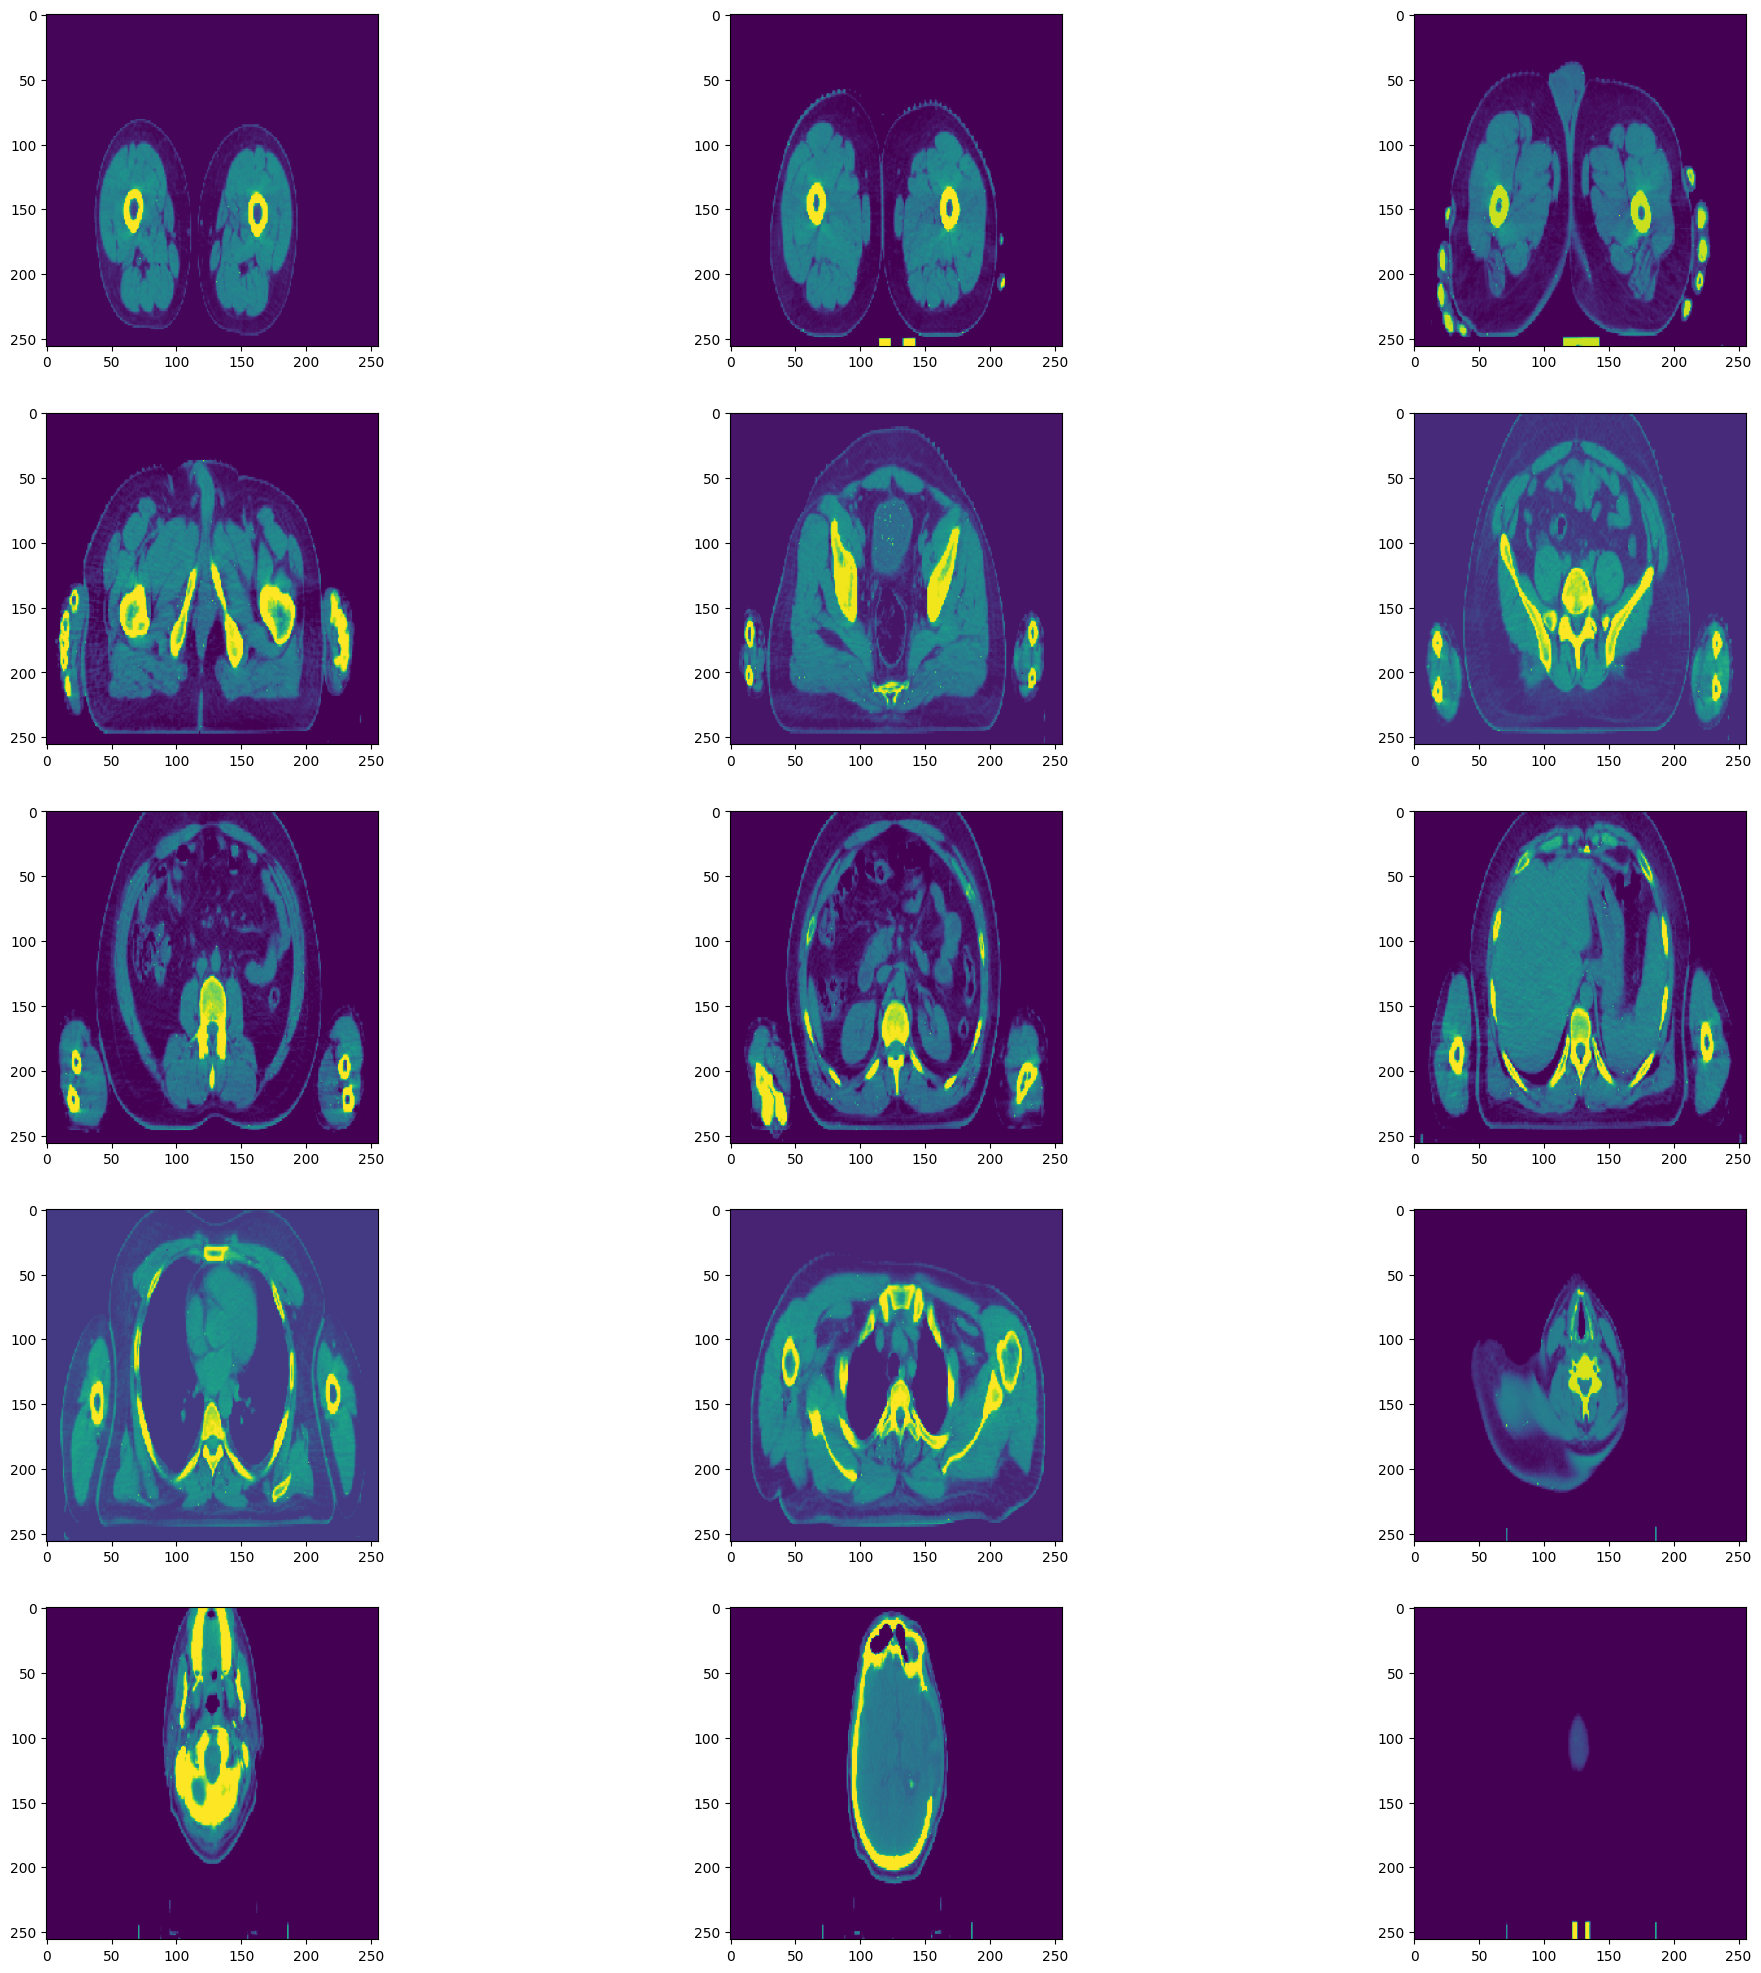

In [40]:
ncols = 3
nrows = 5
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize= (25, 25))
for index, axi in enumerate(ax.flat):
  train = train_load[:,:,index]
  axi.imshow(train)
plt.show()


# train = train_load[:,:,idx]
# plt.imshow(train)
# plt.show()

In [41]:
train_load = nib.load('/workspace/data/AUTO_SEGMENTATION/preds/TMH_Abdomenet/_gt.nii.gz').get_fdata()
train_load.shape

(256, 256, 15)

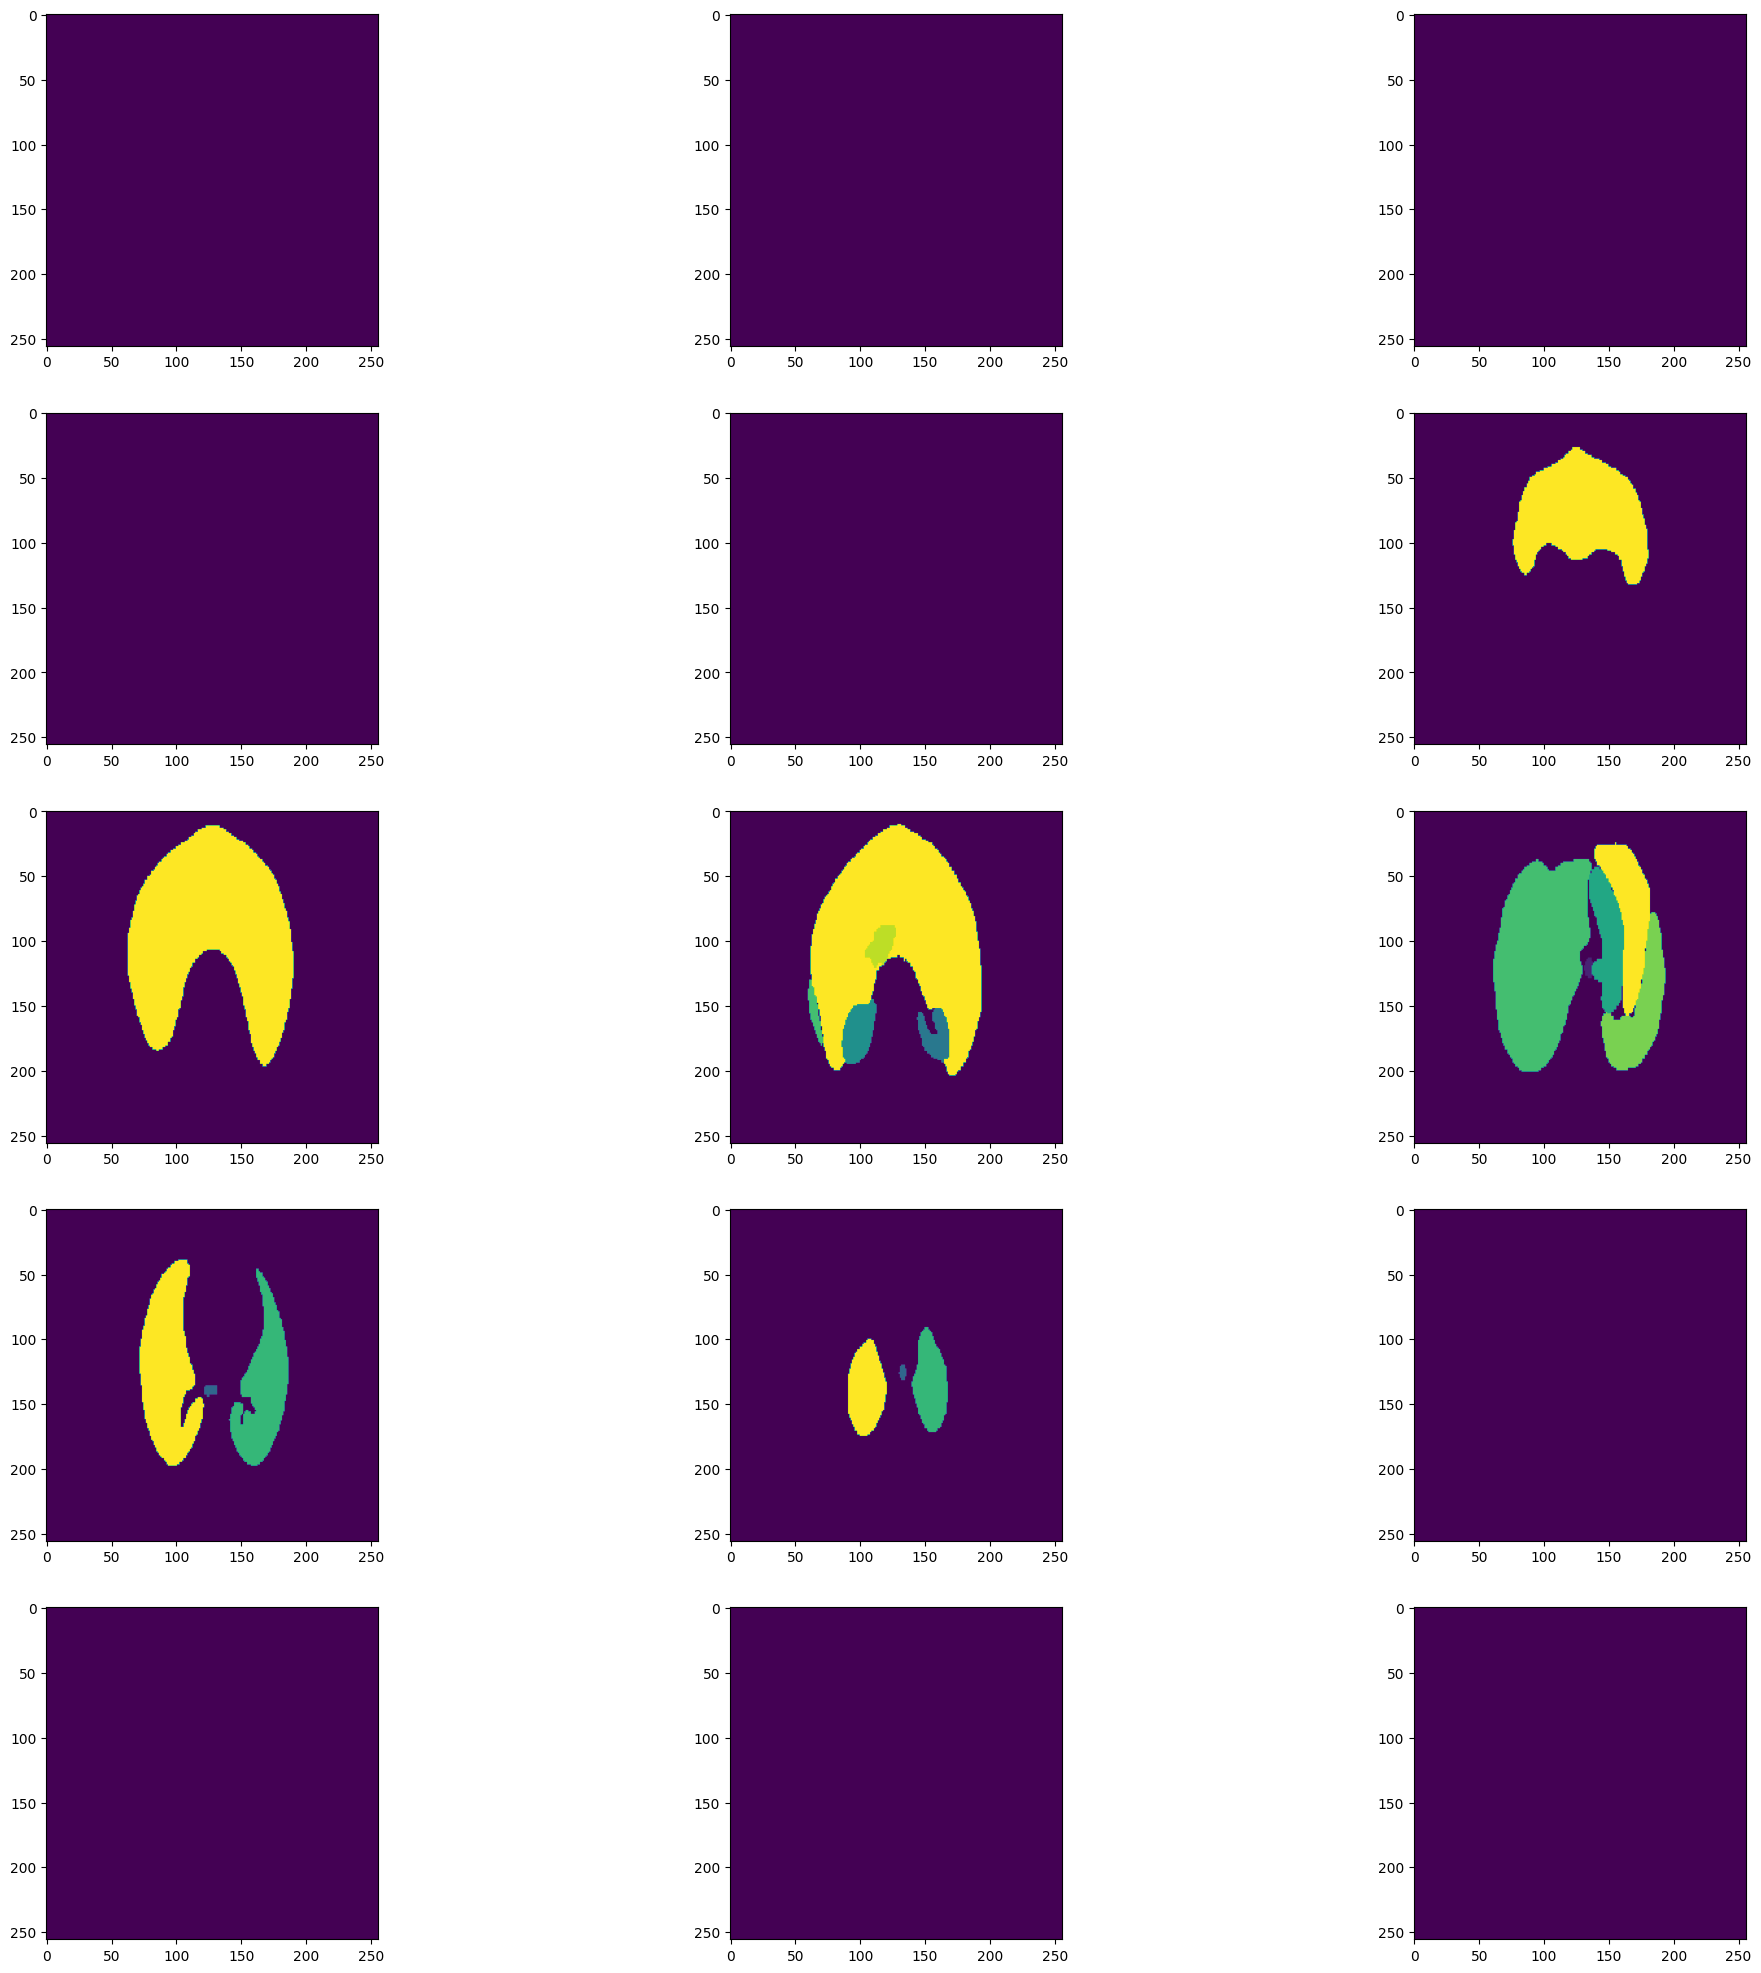

In [42]:
# train = train_load[:,:,idx]
# plt.imshow(train)
# plt.show()

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize= (25, 25))
for index, axi in enumerate(ax.flat):
  train = train_load[:,:,index]
  axi.imshow(train)
plt.show()

In [43]:
train_load = nib.load('/workspace/data/AUTO_SEGMENTATION/preds/TMH_Abdomenet/_pred.nii.gz').get_fdata()
train_load.shape

(256, 256, 15)

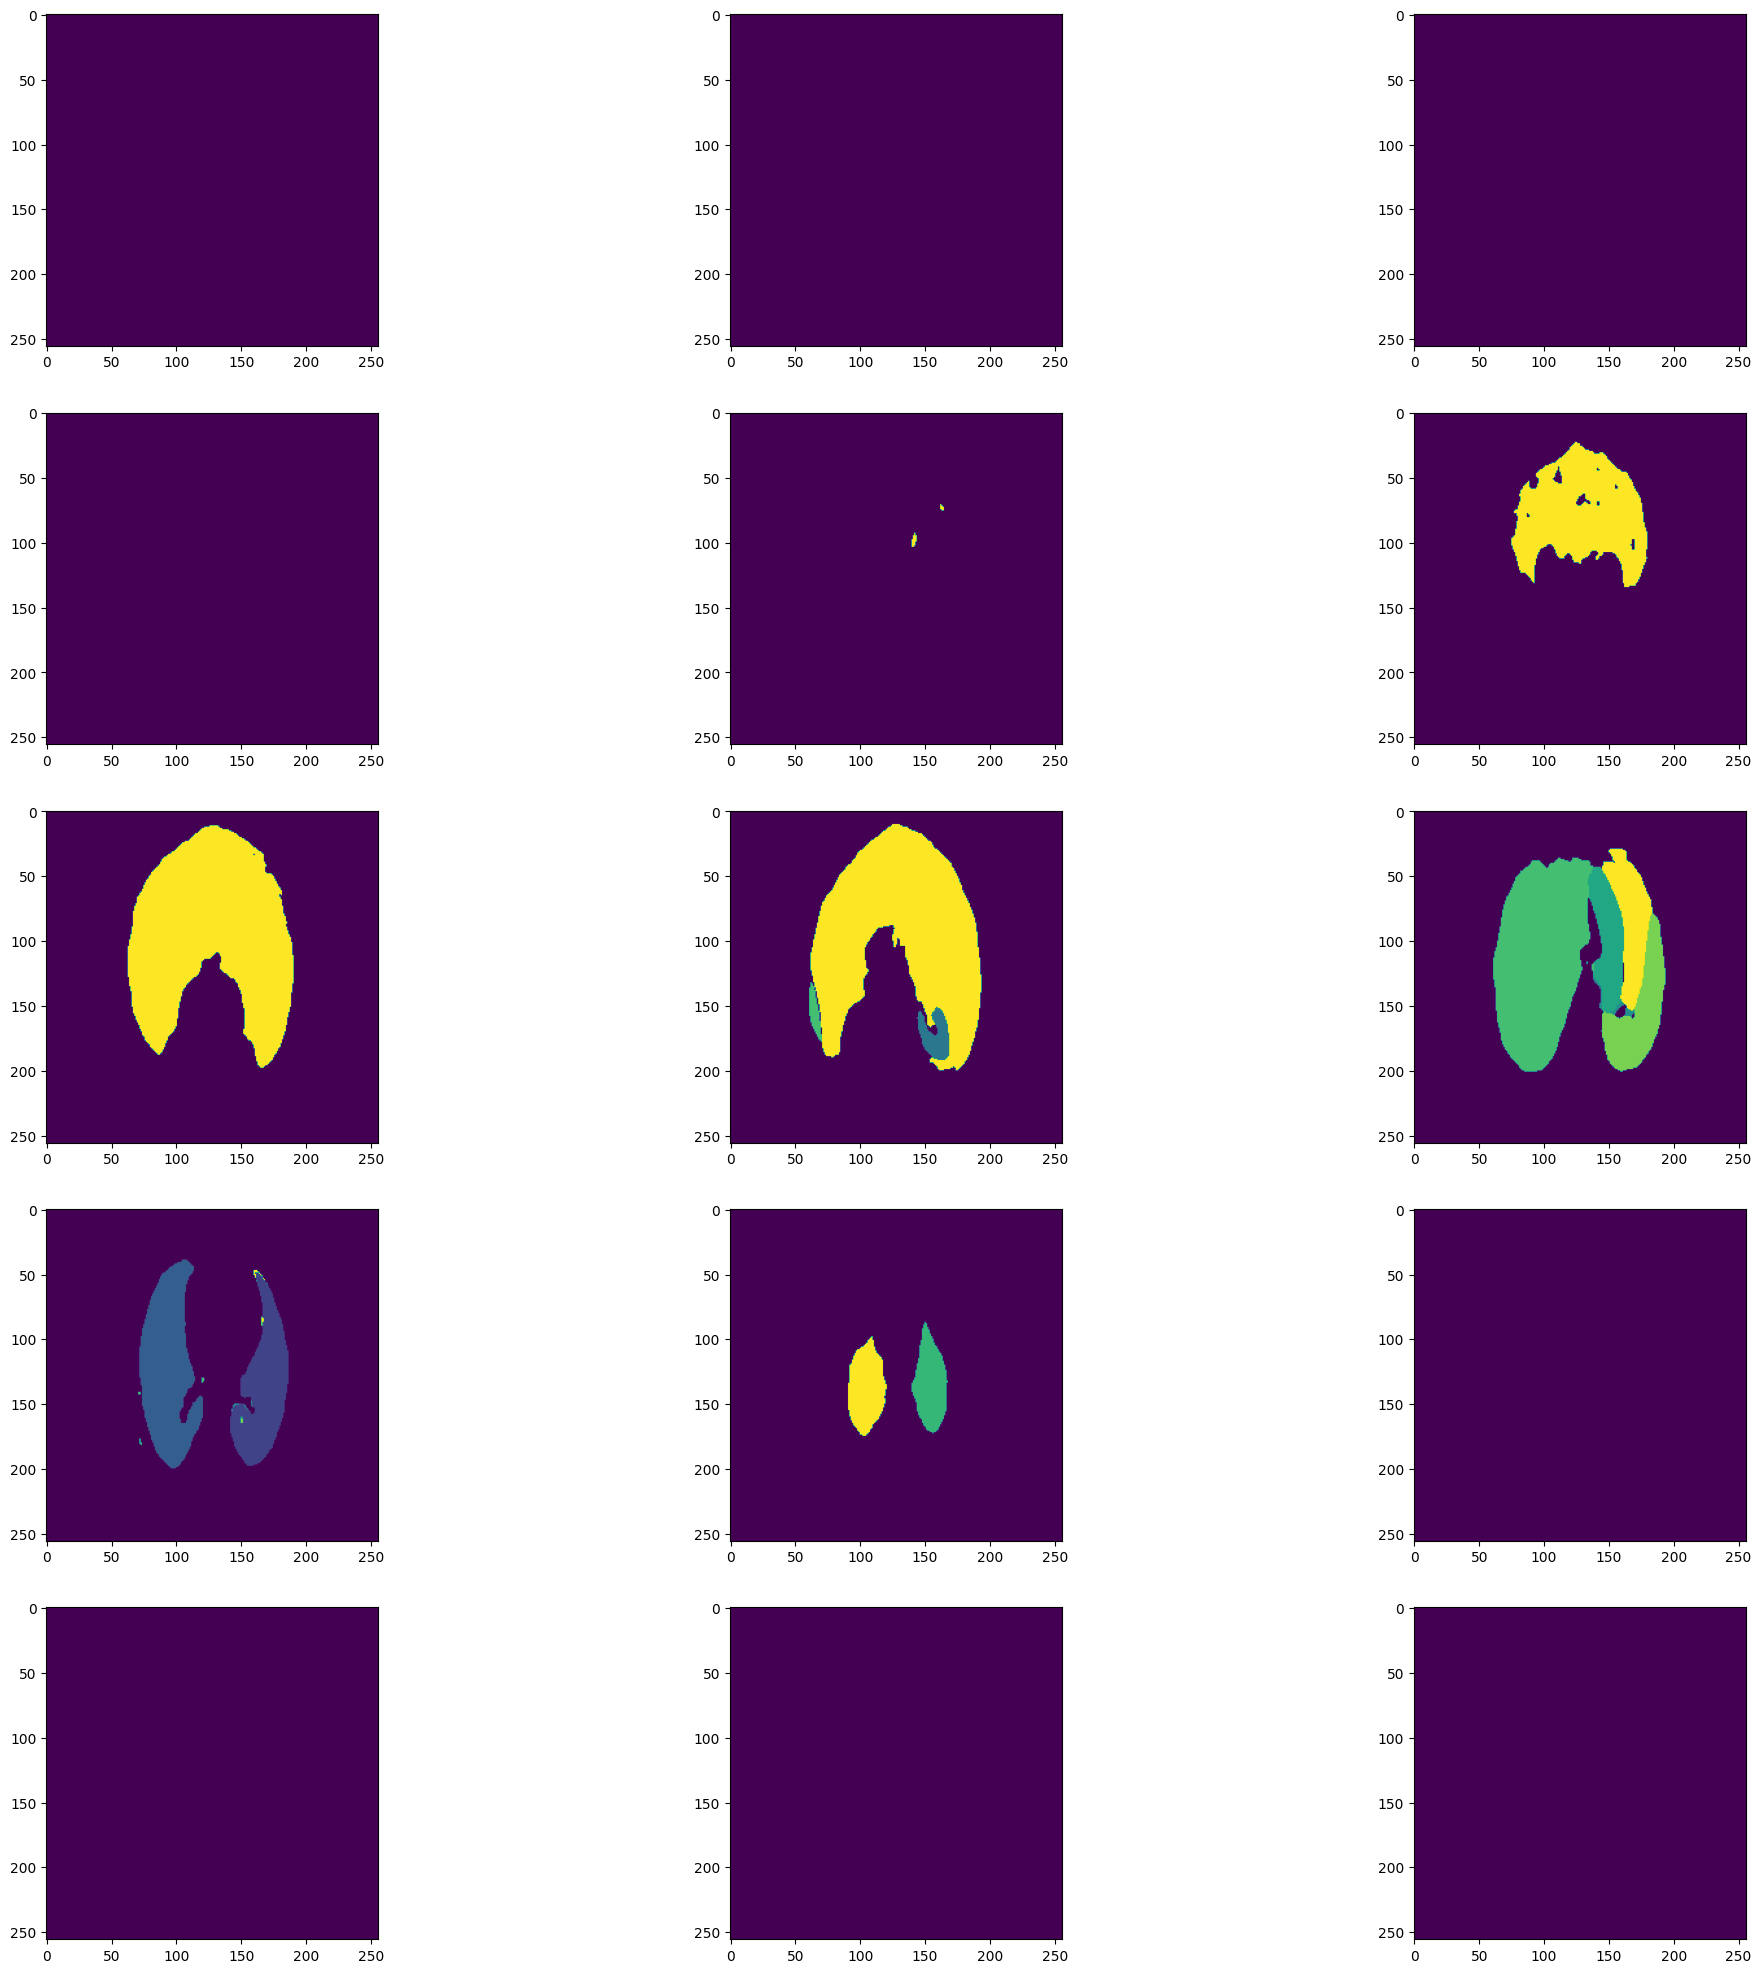

In [44]:
# train = train_load[:,:,idx]
# plt.imshow(train)
# plt.show()

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize= (25, 25))
for index, axi in enumerate(ax.flat):
  train = train_load[:,:,index]
  axi.imshow(train)
plt.show()


In [131]:
torch.cuda.empty_cache()